## 🎹 Spotify Tracks Dataset

In this notebook, the **"🎹 Spotify Tracks Dataset"** dataset is used for data analysis by group group 9 for their MCO. The aim of this project is to analyze the dataset to uncover meaningful patterns, trends, and relationships in the music tracks. This includes understanding the distribution of various attributes such as song durations, popularity, and audio features, identifying correlations between these attributes, and gaining insights into the characteristics that contribute to a song's popularity.

## Notebook sections

1. Dataset description
2. Importing the dataset and Libraries
3. Dataset information
4. Dataset preprocessing (data cleaning)
6. Exploratory Dataset Analysis
7. Research Question

## Dataset description
The dataset is about Spotify songs and tracks, it contains the metadata and audio features of various songs. Each row represents a unique song along with its correspoding information such as the track ID, artist, album name, track name, popularity, etc. The dataset aims to offer a comprehensive view of different songs, useful for analyzing patterns and trends in music.

The dataset primarily consists of information obtained from Spotify, collected using Spotify's API to ensure accuracy and comprehensiveness. Spotify's API provides detailed metadata and audio analysis for each track, including attributes such as popularity, danceability, energy, and more. Some data points were enriched using algorithms designed to analyze and enhance the dataset.

The use of Spotify's API ensures that the data is accurate and representative of the songs available on the platform. However, it also means that the dataset might be biased towards more popular or recent songs, as these are more likely to be available and well-documented on Spotify.

The **"🎹 Spotify Tracks Dataset"** has 114,000 observations and is comprised of 21 variables; the following are variables and their descriptions:

- **track_id:** The Spotify ID for the track
- **artists:** Name(s) of the artist(s) performing the song.
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track.
- **popularity:** Popularity score of the song.
- **duration_ms:** Duration of the song in milliseconds.
- **explicit:** Boolean indicating whether the song contains explicit content.
- **danceability:** Measure of how suitable the song is for dancing.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- **key:** Key in which the song is composed.
- **loudness:** Overall loudness of the song in decibels (dB).
- **mode:** Modality of the song (major or minor).
- **speechiness:** Measure of the presence of spoken words in the song.
- **acousticness:** Measure of how acoustic the song is.
- **instrumentalness:** Measure of the likelihood that the track is instrumental.
- **liveness:** Measure of the presence of an audience in the recording.
- **valence:** Measure of the musical positiveness of the song from 0.0 to 1.0.
- **tempo:** Tempo of the song in beats per minute (BPM).
- **time_signature:** Time signature of the song.
- **track_genre:** Genre of the song.




## Dataset Importing

In this portion, the importing of the dataset as well as the needed library is coded, showcasing the details of its contents.

In [ ]:
# Import for Google collab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from IPython.display import display, Markdown, HTML

#Insert file path
#For the file, just upload "dataset.csv"
file_path = 'dataset.csv'
raw_spotify_df = pd.read_csv(file_path)

raw_spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Dataset information

We can look into the contents of the dataset through the .info() function of numpy to identify if there are null values to be modified.

In [ ]:
# Code to display the contents of the data types of the categories
raw_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Conveniently, there are no null values existing in the variables that are of importance for data analysis in this project. The variables deemed useful for this study will be explained further in the following section.

## Dataset Preprocessing

In this section, the **"Popular Spotify Songs"** dataset is preprocessed for data analysis by group group 9 for their MCO. The aim of this section is to clean and prepare the dataset for further analysis, ensuring that it is free of inconsistencies, missing values, and other issues that could affect the quality and accuracy of the analysis. By performing the preprocessing, we aim to create a clean, reliable dataset that will support accurate and meaningful insights during the exploratory data analysis (EDA) and subsequent phases of the project.

It is of great importance in the first step to consider duplicate values in a dataset. Not just because there are no null values in the important values of the dataset would mean that the dataset is free from error of duplicate values. The following code would indicate which rows are duplicate values (meaning the second, third, and so forth occurence of a first occurence of the data duplicated).

In [ ]:
# code for checking of duplicates
# the .duplicated() returns True for values that are duplicates of the first instance of the value, and False for all firsts.
duplicates = raw_spotify_df.duplicated()

# False values in pandas are equivalent to 0, while True values are 1. Hence, the sum of the duplicates is the number of True (duplicate) values.
print(duplicates.sum())

0


Conveniently, there are no duplicates.

The second step is to consider portions of the dataset that truly matter for analysis such as:
- popularity
- duration_ms
- explicit
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- time_signature
- track_genre


In [ ]:
# Code for the spotify dataframe to have only the mentioned variables
raw_spotify_df = raw_spotify_df[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']]
raw_spotify_df.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


The **duration_ms** variable is not straight-forward for interpretability. It is of good practice in data analysis to present these raw data in a fashion that is conventionally convenient for all to observe. Through this, converting the values to minutes instead of milliseconds would not only be interpretable for humans, but also reduces the potential high value calculations when creating the model to be created using this dataset.

In [ ]:
# converting the values of 'duration_ms' from milliseconds to minutes.
# 1 ms * (1 second / 1000 ms) * (1 minute / 60 seconds) = 1/60000, hence divide the ms values by 60000
raw_spotify_df['duration_ms'] = raw_spotify_df['duration_ms'] / 60000

#Do not forget: rename the column 'duration_ms' to 'duration_min', then assign the new dataset to 'spotify_df'
spotify_df = raw_spotify_df.rename(columns={'duration_ms': 'duration_min'})

#The new main dataset: 'spotify_df'
spotify_df.head()

<ipython-input-5-12c7ca71fd3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_spotify_df['duration_ms'] = raw_spotify_df['duration_ms'] / 60000


,popularity,duration_min,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,3.513767,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Exploratory Data Analysis

In this section, the **"Popular Spotify Songs"** dataset is explored for data analysis by group group 9 for their MCO. The aim of this section is to uncover meaningful patterns, trends, and relationships within the data. This involves understanding the distribution of variables, identifying relationships and correlations, detecting outliers and anomalies, and visualizing the data. The insights gained from this exploratory analysis will form the foundation for further in-depth studies and help in forming hypotheses for subsequent phases of the project.

Below are the identified EDAs that we will conduct:
1. What are the most common genres in the dataset?
2. How does song popularity vary across different genres?
3. Is there a correlation between song attributes (like danceability, energy) and popularity?
4. What are the central tendencies of song duration to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
5. What are the central tendencies of danceability to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
6. What are the central tendencies of energy to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
7. What are the central tendencies of loudness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
8. What are the central tendencies of speechiness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
9. What are the central tendencies of acousticness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
10. What are the central tendencies of instrumentalness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
11. What are the central tendencies of liveness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
12. What are the central tendencies of valence to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?
13. What are the central tendencies of tempo to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?


# What are the most common genres in the dataset?
To gain a better understanding of the dataset, it's crucial to first identify the most common genres represented. This analysis provides insights into the distribution of songs across various genres, helping us to understand which genres are more prevalent and potentially more influential in our dataset.By examining the number of songs in each genre, we can determine the overall diversity and concentration of musical styles. This information is essential for identifying trends and patterns within the dataset, and it will also guide us in selecting genres for more detailed analysis.

In the code cell below, we will show the available genres in the dataset along with the number of songs in each genre. This preliminary step sets the foundation for further exploration and analysis of genre-based differences in song characteristics and popularity.

In [ ]:
# Count the number of occurrences of each genre
genre_counts = spotify_df['track_genre'].value_counts()

# Convert to DataFrame
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Display the number of unique genres
unique_genre_count = genre_counts_df.shape[0]
print(f"Number of unique genres: {unique_genre_count}\n")

# Display the DataFrame
display(HTML(genre_counts_df.to_html(index=False)))

Number of unique genres: 114



Genre,Count
acoustic,1000
punk-rock,1000
progressive-house,1000
power-pop,1000
pop,1000
pop-film,1000
piano,1000
party,1000
pagode,1000
opera,1000


The dataset contains 114 unique genres, including pop, classical, rock, and more. Each genre has an equal number of 1,000 songs, meaning we can't identify a "most common" genre based on frequency alone. This uniform distribution ensures no single genre dominates the dataset, allowing for fair and unbiased comparisons across genres. As a result, our analyses on how song characteristics and popularity vary across genres will be more accurate and meaningful.

# How does song popularity vary across different genres?
The genre of a song often plays a significant role in its popularity. Different genres cater to varying tastes and preferences among listeners, and understanding how popularity is distributed across these genres can provide valuable insights into trends in the music industry. This analysis aims to investigate the relationship between song genres and their popularity scores. From the question earlier we found that there is no common genre in the dataset as there is a balance distribution of songs for each genre. Therefore we will select eight unqiue genres for this analysis, namely: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie are the genres that we will be using.

In the code cell below, we will analyze how song popularity varies across different genres. By examining the average popularity scores for songs in each genre.This preliminary analysis will provide valuable insights into the relationship between genre and song popularity, setting the foundation for further exploration and understanding of genre-based differences in music characteristics.

**Pre-processing subsection**

This part is a pre-processing supplementary section to lessen the lines of code for the following EDAs.
The goal of this section is to combine all the genres that matter instead of individually calculating the targeted values of each genre's extracted dataset.

In [ ]:
# Create new dataframe with all the genres stated above
spotify2_df = spotify_df[(spotify_df['track_genre'] == 'pop') | (spotify_df['track_genre'] == 'hip-hop') | (spotify_df['track_genre'] == 'rock') | (spotify_df['track_genre'] == 'jazz') | (spotify_df['track_genre'] == 'classical') | (spotify_df['track_genre'] == 'k-pop') | (spotify_df['track_genre'] == 'country') | (spotify_df['track_genre'] == 'indie')]
spotify2_df.head()

,popularity,duration_min,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16000,58,4.971100,False,0.643,0.268,-15.073,0.0900,0.593,0.000002,0.316,0.620,143.813,4,classical
16001,59,8.043100,False,0.484,0.898,-4.132,0.1640,0.365,0.000000,0.091,0.680,91.975,4,classical
16002,54,3.657283,False,0.608,0.638,-6.008,0.0292,0.581,0.017200,0.448,0.439,140.109,4,classical
16003,68,4.985767,False,0.695,0.293,-16.278,0.0431,0.596,0.015800,0.132,0.637,143.804,4,classical
16004,59,6.461933,False,0.583,0.308,-18.303,0.0465,0.581,0.010600,0.257,0.241,118.226,4,classical


Now that we have a separate dataframe from each unique genre let as now calculate the mean popularity for each genre and display them using box plot.  

In [ ]:
# Calculate the the mean popularity of each genre
popularity_df = spotify2_df.groupby('track_genre').agg({'popularity': ['mean', 'median', 'std']})
popularity_df.sort_values(('popularity', 'mean'), ascending=False)

popularity                  
                  mean median        std
track_genre                             
k-pop           56.896   60.0  16.946456
pop             47.576   66.0  34.040461
indie           38.895   47.0  30.139017
hip-hop         37.759   58.0  32.550891
rock            19.001    0.0  32.539758
country         17.028    0.0  27.193762
jazz            13.628    0.0  23.182905
classical       13.055    3.0  18.093296

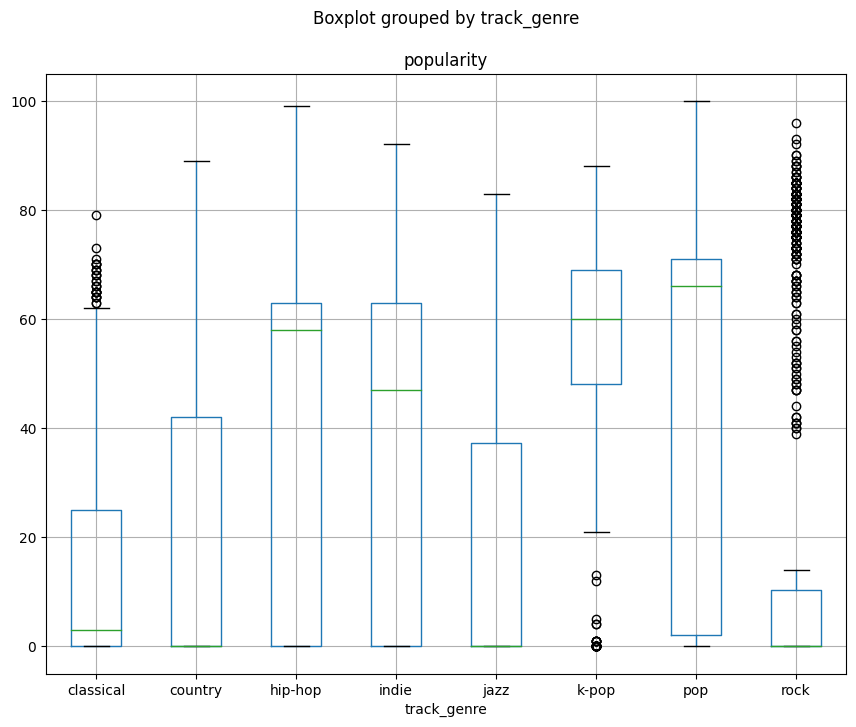

In [ ]:
# The box plot of the popularity of the unique genres
spotify2_df.boxplot('popularity', by='track_genre', figsize=(10, 8))
plt.show()

The box plot shows that K-Pop and Pop are the most popular genres, with high median popularity scores. Classical and Pop have many outliers, indicating several exceptionally popular songs amidst generally low to moderate popularity. K-Pop has a few low-popularity outliers, while Hip-Hop shows high-popularity outliers, reflecting its wide variability. Overall, K-Pop and Pop are the most popular genres, while Classical and Jazz are the least popular, with notable variability in Hip-Hop and Classical.

## Is there a correlation between song attributes (like danceability, energy) and popularity?
To answer this question, we first need to get three variables on interest. Danceability, Energy, and popularity

In [ ]:
#Declaring a new dataframe called 'dan_ene_pop', to store the there variables
dan_ene_pop = spotify2_df[['danceability', 'energy', 'popularity']]
#Display temporary dataset
dan_ene_pop.head()

,danceability,energy,popularity
16000,0.643,0.268,58
16001,0.484,0.898,59
16002,0.608,0.638,54
16003,0.695,0.293,68
16004,0.583,0.308,59


To measure the correlation between these variables, let us display a correlation matrix between them, and some scatterplots to better visualize their relationships. This matrix shows us the pearson's correlation values between the three variables in the dataset. Pearson's correlation measures the linear relationship between two variables, -1 being a negative relationship, 0 representing no relationship, and 1 being a perfect linear relationship

The values in the correlation matrix display a slight postitive correlation between popularity and danceability, as well as energy and popularity with a 0.2356 and 0.2339 correlation value respectively.

              danceability    energy  popularity
danceability      1.000000  0.432761    0.235588
energy            0.432761  1.000000    0.233880
popularity        0.235588  0.233880    1.000000


Text(0.5, 1.0, 'Danceability vs popularity')

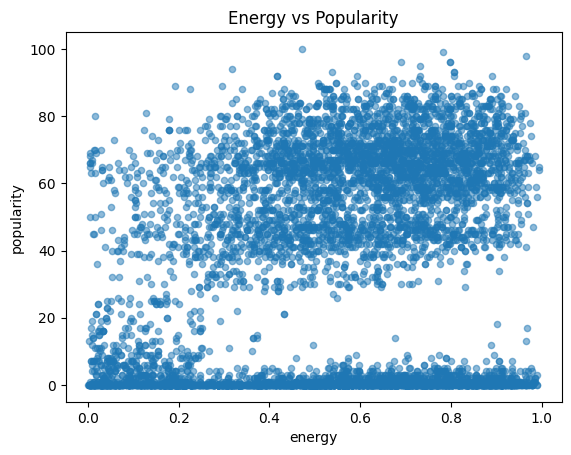

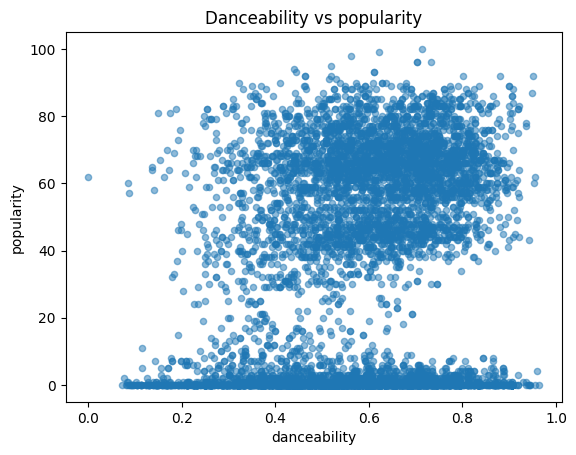

In [ ]:
#Displays the Pearson's correlation coeffecient of all variables.
corr_matrix=dan_ene_pop.corr()
print(corr_matrix)
#Displays the scatterplot of energy and populatrity
dan_ene_pop.plot.scatter(x='energy', y='popularity', alpha=0.5)
plt.title('Energy vs Popularity')
#Displays the scatterplot of danceability and popularity
dan_ene_pop.plot.scatter(x='danceability', y='popularity', alpha=0.5)
plt.title('Danceability vs popularity')

The above scatterplots show us the relationship between our two pairs of variables. We chose a scatterplot because of its ease in visualizing correlation. Though, while not very evident in this case, there is a very small positive correlation between energy and danceability, as well as danceability and popularity according to the correlation matrix.

# What are the central tendencies of song duration to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of song duration across genres reveals the typical lengths of songs within each genre. This helps identify structural patterns and conventions,understanding these trends is crucial for crafting genre-specific music and marketing strategies. The code below calculates the mean, median, and standard deviation of song durations for each genre, allowing for a detailed comparison of these central tendencies

In [ ]:
duration_df = spotify2_df.groupby('track_genre').agg({'duration_min': ['mean', 'median', 'std']})
duration_df.sort_values(('duration_min', 'mean'), ascending=False)

duration_min                    
                    mean    median       std
track_genre                                 
k-pop           4.187953  3.829550  2.653177
classical       3.884583  3.042425  3.793178
pop             3.677880  3.525367  0.942479
rock            3.661242  3.624883  1.011921
indie           3.479276  3.363583  0.906314
hip-hop         3.444675  3.315917  0.945057
country         3.433317  3.391775  0.731379
jazz            3.172370  2.942550  1.323808

Now that we have the mean, median, and standard deviation of song durations for each genre, let as now create a box plot to better visualize the information we have collected.

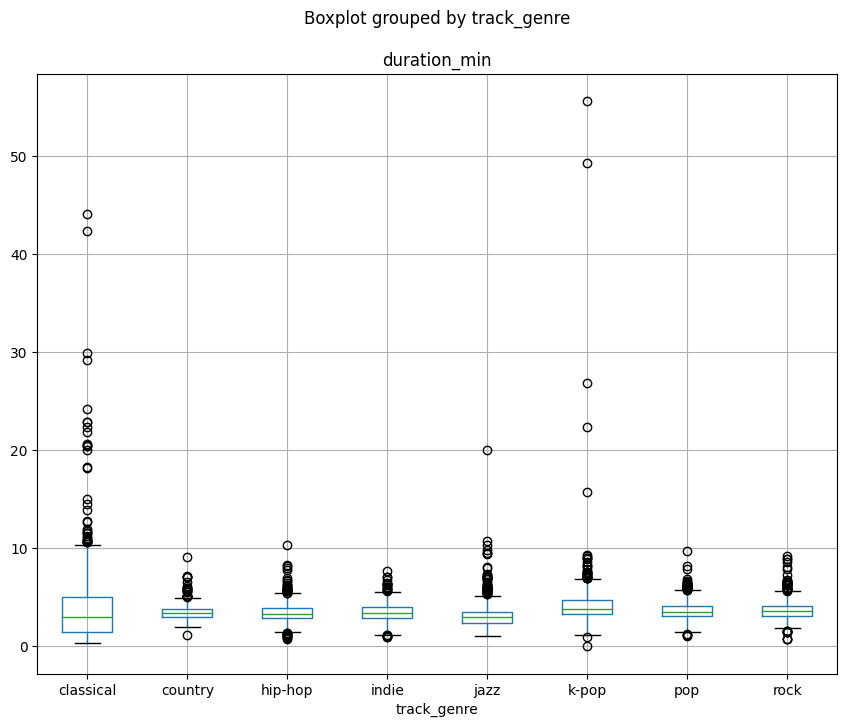

In [ ]:
spotify2_df.boxplot('duration_min', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows the distribution of song durations across genres,lassical songs exhibit the highest variability and the longest durations, with many outliers. K-pop songs also show considerable variability, but their median duration is closer to other modern genres. Jazz songs have lower variability and fewer outliers, indicating more consistent song lengths. Pop, Rock, Hip-hop, Indie, and Country have similar patterns with moderate variability and fewer extreme outliers, suggesting standard song lengths that align with audience expectations.


Note that countable values significantly differ from both classical and K-pop genres. Since these records are less than 5% of the dataset to model, removing these outliers would affect the model so that extreme outliers would not drastically affect the creation of it.

In [ ]:
#Identification of the extreme outlier indices
sus_df = spotify2_df[spotify2_df['duration_min'] > 30]
sus_df.head()

,popularity,duration_min,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16519,32,42.409350,False,0.645,0.638,-8.024,0.0349,0.695,0.000000,0.0684,0.766,148.153,4,classical
16611,33,44.114433,False,0.183,0.274,-14.184,0.0346,0.950,0.002020,0.0629,0.259,103.624,3,classical
65475,53,55.677867,False,0.719,0.466,-9.153,0.0417,0.733,0.000002,0.0973,0.812,137.159,4,k-pop
65744,47,49.297333,False,0.598,0.623,-7.399,0.0817,0.817,0.000000,0.0538,0.935,143.031,4,k-pop


In [ ]:
#code to remove the outliers from sus_df that match in spotify2_df
spotify2_df = spotify2_df.drop(sus_df.index)

#recalculate the duration_df table
duration_df = spotify2_df.groupby('track_genre').agg({'duration_min': ['mean', 'median', 'std']})
duration_df.sort_values(('duration_min', 'mean'), ascending=False)

duration_min                    
                    mean    median       std
track_genre                                 
k-pop           4.091160  3.829275  1.530987
classical       3.805671  3.035425  3.361383
pop             3.677880  3.525367  0.942479
rock            3.661242  3.624883  1.011921
indie           3.479276  3.363583  0.906314
hip-hop         3.444675  3.315917  0.945057
country         3.433317  3.391775  0.731379
jazz            3.172370  2.942550  1.323808

Now that we have the recalculated mean, median, and standard deviation of song durations for each genre, let as now create a box plot to better visualize the information we have collected.

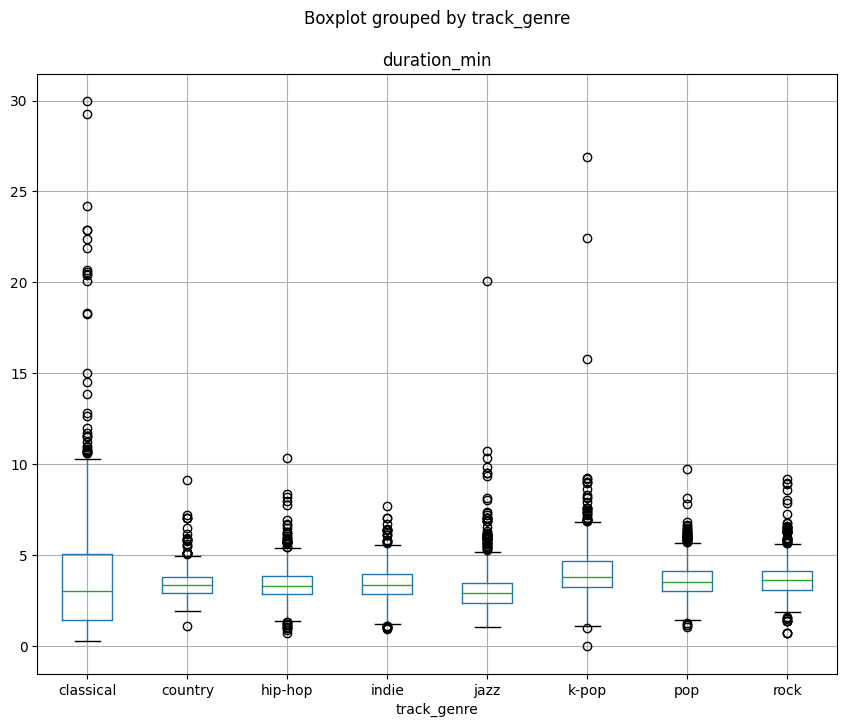

In [ ]:
spotify2_df.boxplot('duration_min', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Classical has the highest median and variability in song duration, with many songs extending up to 30 minutes. In contrast, Country, Hip-hop, Indie, Jazz, K-pop, Pop, and Rock have more consistent song durations, with medians around 3 to 5 minutes. Removing outliers clarifies the typical duration range for each genre.

# What are the central tendencies of danceability to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of danceability across genres helps identify typical danceability levels within each genre. This analysis provides insights into rhythmic characteristics, understanding these trends also sets the stage for further investigation into how danceability influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the danceability of the songs for each genre, allowing for a detailed comparison of these central tendencies

In [ ]:
danceability_df = spotify2_df.groupby('track_genre').agg({'danceability': ['mean', 'median', 'std']})
danceability_df.sort_values(('danceability', 'mean'), ascending=False)

danceability                  
                    mean  median       std
track_genre                               
hip-hop         0.736154  0.7530  0.119155
k-pop           0.647710  0.6560  0.135531
pop             0.630441  0.6420  0.136880
indie           0.587272  0.5820  0.144667
country         0.555294  0.5575  0.124485
rock            0.543609  0.5520  0.135645
jazz            0.509975  0.4990  0.141325
classical       0.381859  0.3770  0.145299

Now that we have the mean, median, and standard deviation of the danceability of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

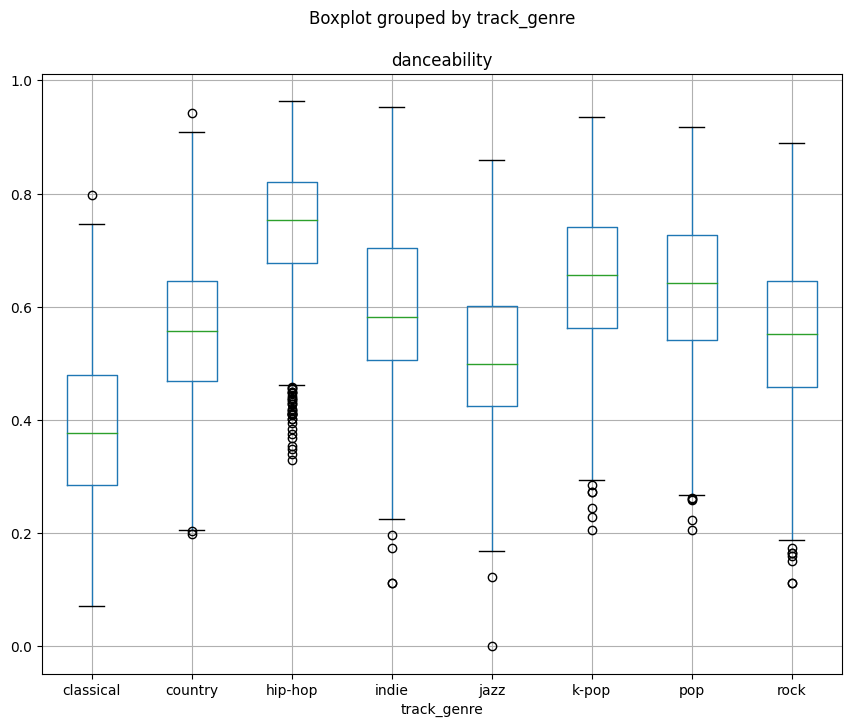

In [ ]:
spotify2_df.boxplot('danceability', by='track_genre', figsize=(10, 8))
plt.show()

Notice the relevance of the central tendency of the Hip-hop genre compared to other genres of comparison. The second place to Hip-hop is K-pop, commonly a genre of "dancing along to the melody." These observations are crucial for understanding the rhythmic characteristics of each genre and can guide artists, producers, and marketers in aligning their work with genre-specific trends and audience preferences. Pop and Rock also exhibit high danceability, while Indie and Jazz show lower median scores with wider variability. Country and Classical have the lowest danceability, emphasizing different musical elements.

# What are the central tendencies of energy to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of energy across genres helps identify typical energy levels within each genre. This analysis provides insights into the intensity and liveliness of songs. Understanding these energy trends also sets the stage for further investigation into how energy influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the energy of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
energy_df = spotify2_df.groupby('track_genre').agg({'energy': ['mean', 'median', 'std']})
energy_df.sort_values(('energy', 'mean'), ascending=False)

energy                  
                 mean  median       std
track_genre                            
hip-hop      0.682530  0.6900  0.145933
rock         0.679071  0.7030  0.191544
k-pop        0.675917  0.7015  0.176336
pop          0.606437  0.6180  0.177721
country      0.596805  0.6105  0.211086
indie        0.556192  0.5465  0.202395
jazz         0.352954  0.3320  0.185893
classical    0.189294  0.1420  0.177340

Now that we have the mean, median, and standard deviation of the energy of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

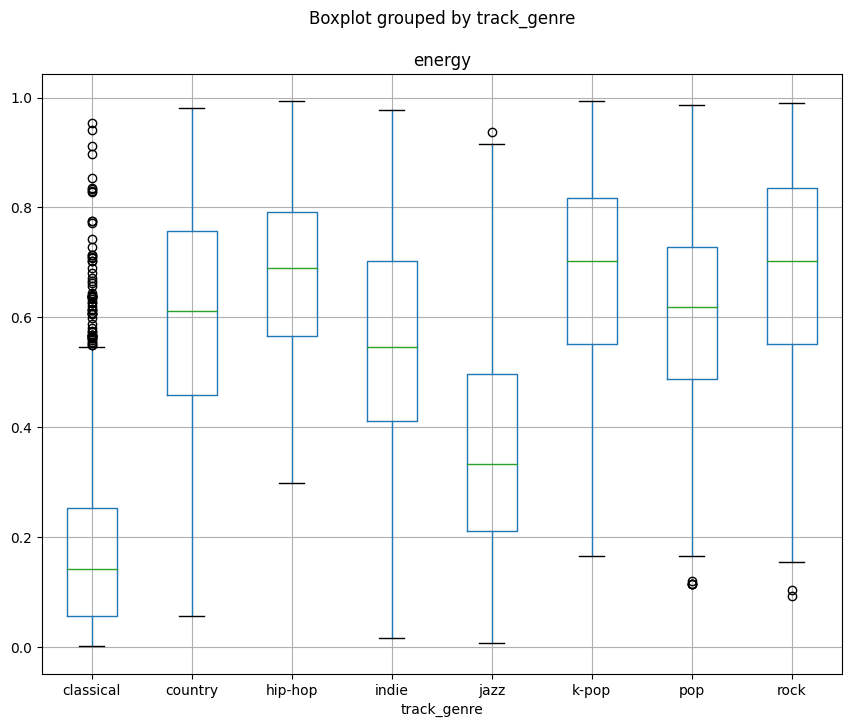

In [ ]:
spotify2_df.boxplot('energy', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Hip-hop, K-pop, and Rock have the highest median energy scores, indicating these genres are the most intense and lively. Pop and Indie also have high energy but with more variability. Country has a moderate median energy score with a wide range. Jazz and Classical have the lowest median energy scores, reflecting their more subdued nature.

# What are the central tendencies of loudness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of loudness across genreshelps identify typical volume levels within each genre. This analysis provides insights into the loudness characteristics that define each genre. Understanding these loudness trends also sets the stage for further investigation into how loudness influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the loudness of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
loudness_df = spotify2_df.groupby('track_genre').agg({'loudness': ['mean', 'median', 'std']})
loudness_df.sort_values(('loudness', 'mean'), ascending=False)

loudness                   
                  mean   median       std
track_genre                              
hip-hop      -5.981619  -5.8910  2.031075
k-pop        -6.467157  -6.1350  2.923867
rock         -6.664481  -6.1270  2.648483
pop          -6.953969  -6.7245  2.562617
country      -7.281778  -6.4950  2.999765
indie        -8.285909  -7.8145  3.230437
jazz        -11.578765 -10.6985  4.315708
classical   -20.163335 -20.5560  7.360346

Now that we have the mean, median, and standard deviation of the loundness of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

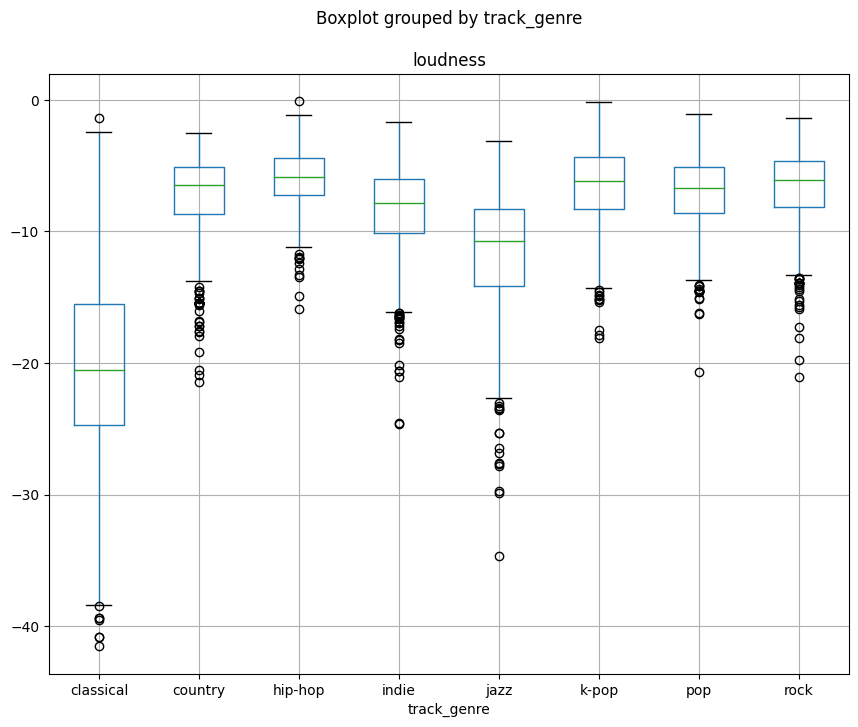

In [ ]:
spotify2_df.boxplot('loudness', by='track_genre', figsize=(10, 8))
plt.show()

A dB of 0 is like the loudest in respect to some basis "loudness (amplitude to be technical of waveforms)", so the more negative it becomes, the more quiet the sound is.

The boxplot shows that Pop, Hip-hop, K-pop, and Rock genres generally have the highest loudness levels, with medians close to -5 dB. These genres favor louder tracks, reflecting their energetic and engaging nature. Indie and Country have moderate loudness levels, with medians around -10 dB, indicating a mix of both loud and softer tracks. Jazz and Classical genres exhibit the lowest loudness levels, with medians below -20 dB, emphasizing their preference for quieter and more dynamic soundscapes.

# What are the central tendencies of speechiness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of speechiness across genreshelps identify typical levels of spoken content within each genre. This analysis provides insights into the extent to which songs feature spoken words versus sung lyrics.  Understanding these speechiness trends also sets the stage for further investigation into how speechiness influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the speechiness of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
speechiness_df = spotify2_df.groupby('track_genre').agg({'speechiness': ['mean', 'median', 'std']})
speechiness_df.sort_values(('speechiness', 'mean'), ascending=False)

speechiness                   
                   mean   median       std
track_genre                               
hip-hop        0.130353  0.09480  0.097997
k-pop          0.088077  0.05670  0.086315
pop            0.079975  0.04840  0.077061
indie          0.062655  0.04190  0.057910
jazz           0.055013  0.03890  0.075285
classical      0.050863  0.04260  0.044748
rock           0.049923  0.03785  0.036989
country        0.042268  0.03360  0.028409

Now that we have the mean, median, and standard deviation of the speechiness of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

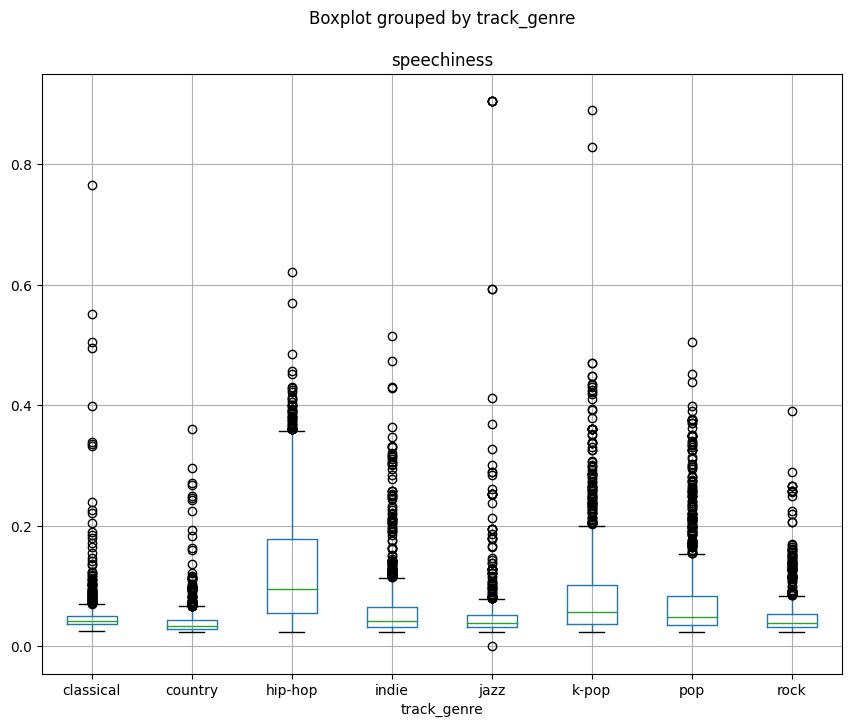

In [ ]:
spotify2_df.boxplot('speechiness', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Hip-hop has the highest median speechiness, indicating a higher prevalence of spoken words. Indie, Jazz, and K-pop have moderate speechiness scores, reflecting a mix of spoken and sung lyrics. Pop and Rock exhibit lower speechiness, primarily featuring sung lyrics but with some variability. Country and Classical have the lowest speechiness, indicating minimal spoken word content.

# What are the central tendencies of acousticness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of acousticness across genres helps identify typical use of acoustic elements within each genre. This analysis provides insights into acoustic characteristics, understanding these acousticness trends also sets the stage for further investigation into how acoustic elements influence song popularity across different genres. The code below calculates the mean, median, and standard deviation of the acousticness of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
acousticness_df = spotify2_df.groupby('track_genre').agg({'acousticness': ['mean', 'median', 'std']})
acousticness_df.sort_values(('acousticness', 'mean'), ascending=False)

acousticness                  
                    mean  median       std
track_genre                               
classical       0.920244  0.9730  0.142057
jazz            0.715816  0.7870  0.241825
indie           0.380386  0.3230  0.315594
pop             0.343693  0.2810  0.285680
country         0.321227  0.2300  0.286754
k-pop           0.292002  0.1860  0.280724
rock            0.209242  0.0956  0.247436
hip-hop         0.194175  0.1240  0.195117

Now that we have the mean, median, and standard deviation of the acousticness of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

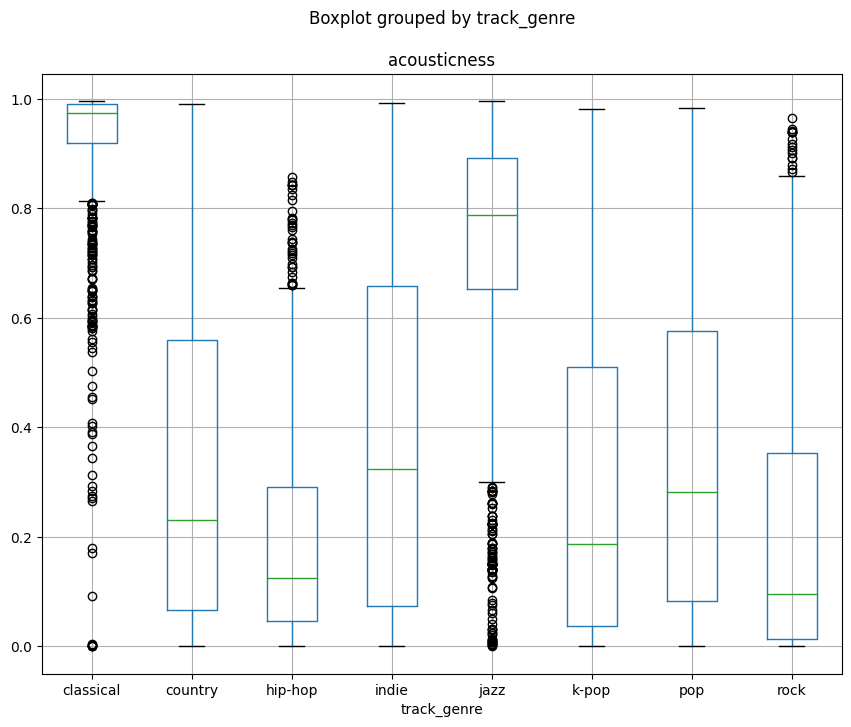

In [ ]:
spotify2_df.boxplot('acousticness', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Classical and Jazz have the highest median acousticness scores, indicating a strong preference for acoustic elements. Country and Indie also have high acousticness, though not as dominant. Pop and Rock have lower median scores, favoring electronic sounds but with some variability. Hip-hop and K-pop have the lowest acousticness, reflecting their focus on electronic production.

# What are the central tendencies of instrumentalness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of instrumentalness across genres helps identify typical levels of instrumental content versus vocal content within each genre. This analysis provides insights into instrumental characteristics, understanding these instrumentalness trends also sets the stage for further investigation into how instrumental elements influence song popularity across different genres. The code below calculates the mean, median, and standard deviation of the instrumentalness of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
instrumentalness_df = spotify2_df.groupby('track_genre').agg({'instrumentalness': ['mean', 'median', 'std']})
instrumentalness_df.sort_values(('instrumentalness', 'mean'), ascending=False)

instrumentalness                    
                        mean    median       std
track_genre                                     
classical           0.620447  0.865500  0.386232
jazz                0.079561  0.000003  0.230680
indie               0.052806  0.000025  0.169736
rock                0.020978  0.000003  0.090074
hip-hop             0.010907  0.000000  0.070696
k-pop               0.009848  0.000001  0.070431
pop                 0.009026  0.000000  0.060136
country             0.005585  0.000000  0.042592

Now that we have the mean, median, and standard deviation of the instrumentalness of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

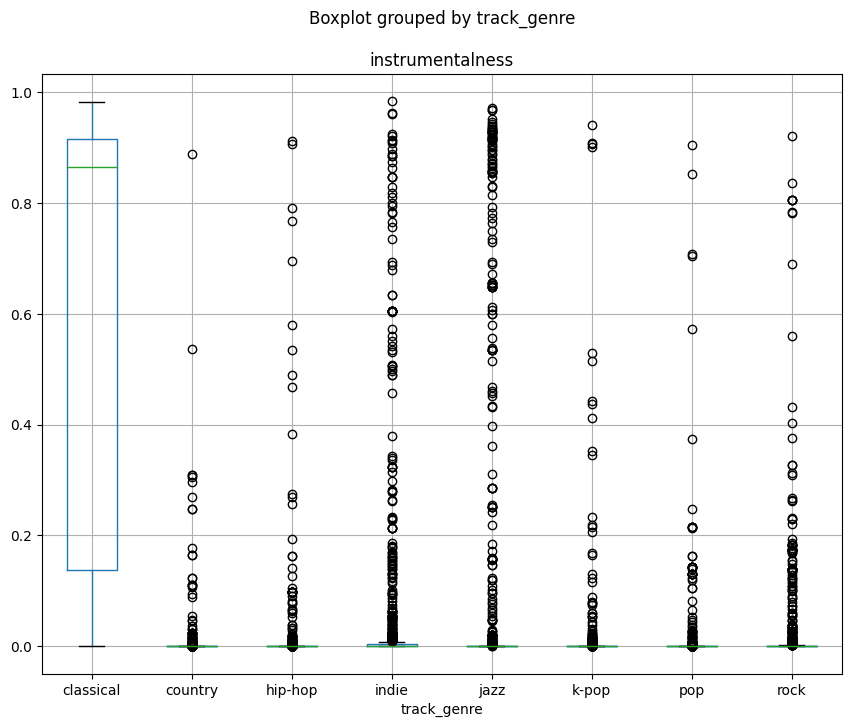

In [ ]:
spotify2_df.boxplot('instrumentalness', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Classical has the highest median instrumentalness, indicating most tracks are predominantly instrumental. Jazz has moderate instrumentalness with higher variability, mixing instrumental and vocal tracks. Country, Hip-hop, Indie, K-pop, Pop, and Rock have very low median instrumentalness, suggesting they are primarily vocal, though some outliers indicate a few tracks with significant instrumental content.

# What are the central tendencies of liveness to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of liveness across genres helps identify typical levels of live elements within each genre. This analysis provides insights into how much songs are perceived as live recordings versus studio recordings. Understanding these liveness trends also sets the stage for further investigation into how liveness influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the liveness of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
liveness_df = spotify2_df.groupby('track_genre').agg({'liveness': ['mean', 'median', 'std']})
liveness_df.sort_values(('liveness', 'mean'), ascending=False)

liveness                  
                 mean  median       std
track_genre                            
hip-hop      0.192645  0.1290  0.152136
country      0.177238  0.1210  0.142027
k-pop        0.176498  0.1245  0.129337
rock         0.172513  0.1170  0.133004
jazz         0.170025  0.1230  0.132844
classical    0.167040  0.1200  0.127409
indie        0.160361  0.1120  0.122863
pop          0.158256  0.1175  0.102252

Now that we have the mean, median, and standard deviation of the liveness of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

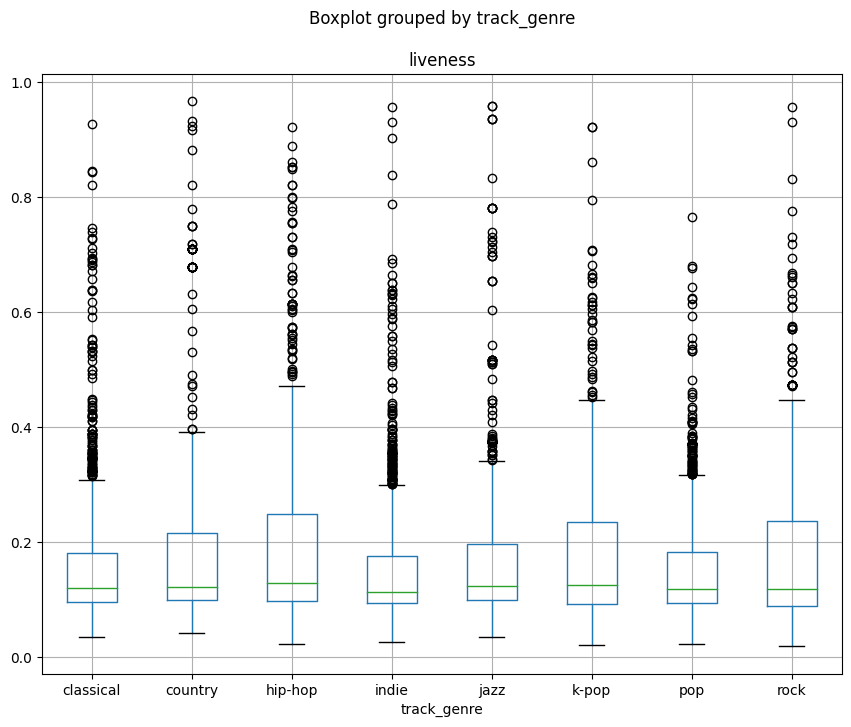

In [ ]:
spotify2_df.boxplot('liveness', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that most genres have median liveness scores around 0.2 to 0.3, indicating moderate live elements in recordings. Classical and Country have lower variability, suggesting consistent live elements, while Hip-hop, Indie, Jazz, K-pop, Pop, and Rock show higher variability, indicating a wide range of live elements. All genres have outliers with high liveness scores, indicating some tracks are perceived as highly live.

# What are the central tendencies of valence to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of valence across genres helps identify the typical emotional tone of songs within each genre. This analysis provides insights into the common emotional characteristics, understanding these valence trends also sets the stage for further investigation into how valence influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the valence of the songs for each genre, allowing for a detailed comparison of these central tendencies.








In [ ]:
valence_df = spotify2_df.groupby('track_genre').agg({'valence': ['mean', 'median', 'std']})
valence_df.sort_values(('valence', 'mean'), ascending=False)

valence                 
                 mean median       std
track_genre                           
k-pop        0.556281  0.570  0.203144
hip-hop      0.551248  0.550  0.224913
rock         0.538903  0.546  0.234430
country      0.521481  0.515  0.227368
pop          0.506223  0.498  0.212209
jazz         0.490289  0.504  0.247885
indie        0.467957  0.453  0.220664
classical    0.380787  0.346  0.261644

Now that we have the mean, median, and standard deviation of the valence of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

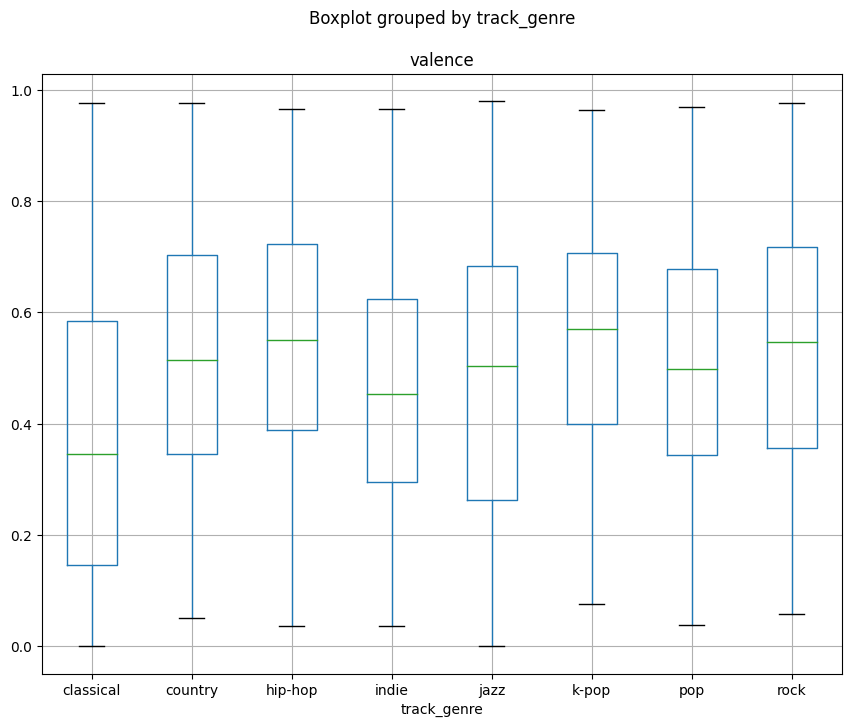

In [ ]:
spotify2_df.boxplot('valence', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Classical has a wide range of valence scores with a median around 0.4, indicating mixed emotional tones. Country and Jazz have higher median valence scores around 0.6, suggesting more positive emotional tones. Hip-hop and Indie have lower median scores around 0.4 to 0.5, reflecting neutral to slightly positive tones. K-pop, Pop, and Rock have moderate median scores around 0.5 to 0.6, indicating a balance between positive and neutral tones.

# What are the central tendencies of tempo to: Pop, Hip-hop, Rock, Jazz, Classical, K-pop, Country and Indie?

Analyzing the central tendencies of tempo across genres helps identify typical speeds or paces of songs within each genre. This analysis provides insights into tempo characteristics, understanding these tempo trends also sets the stage for further investigation into how tempo influences song popularity across different genres. The code below calculates the mean, median, and standard deviation of the tempo of the songs for each genre, allowing for a detailed comparison of these central tendencies.

In [ ]:
tempo_df = spotify2_df.groupby('track_genre').agg({'tempo': ['mean', 'median', 'std']})
tempo_df.sort_values(('tempo', 'mean'), ascending=False)

tempo                     
                   mean    median        std
track_genre                                 
rock         126.321238  123.8725  31.157740
country      123.963307  124.0245  31.759862
pop          120.927073  118.6595  31.066410
k-pop        119.202183  116.4100  27.381319
indie        119.093452  116.0315  30.644526
hip-hop      116.769582  107.2530  29.383495
jazz         112.636469  109.1520  31.640169
classical    107.913844  102.5900  31.050928

Now that we have the mean, median, and standard deviation of the tempo of the songs for each genre, let as now create a box plot to better visualize the information we have collected.

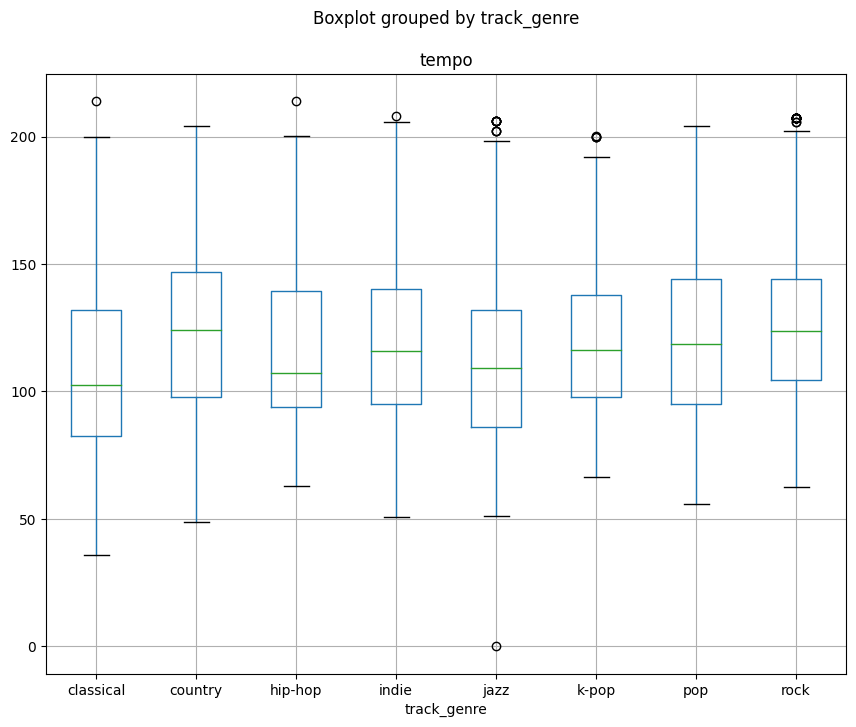

In [ ]:
spotify2_df.boxplot('tempo', by='track_genre', figsize=(10, 8))
plt.show()

The boxplot shows that Classical music has a wide range of tempos with a median around 100 BPM. Country and Hip-hop have similar median tempos around 120 BPM, indicating a moderate pace. Indie and Jazz have median tempos around 115 BPM, with Indie showing higher variability. K-pop, Pop, and Rock have higher median tempos around 120 to 130 BPM, indicating a preference for faster-paced songs. Rock exhibits the highest variability in tempo.

# Research Question
By exploring the dataset and understanding its contents through the numerous EDAs that we have condcuted. The group has come up with a research question to answeer using the dataset which is: **How do the audio features of songs (such as danceability, energy, and acousticness) influence their genre?** This question arose from our exploratory data analysis, where we observed variations in song popularity across genres and potential correlations between audio features.

Understanding the impact of audio features on song genre is crucial for several reasons:
1. Helps artists and producers tailor their music to align with listener preferences within specific genres, enhancing the likelihood of success.

2. Enables marketers to better target their promotions and recommendations, focusing on songs with features that are more likely to resonate with audiences inclined to specific genres.

3. Improves music recommendation systems by incorporating the influence of audio features on genres, leading to more personalized and satisfying user experiences.

4. Informs broader industry trends, helping stakeholders anticipate and adapt to changing listener preferences, ensuring they stay relevant in the evolving music landscape.

Overall, this research has the potential to significantly impact music production, marketing, and consumption by providing a deeper understanding of the audio features representing specific genres.


# Data Modelling: Clustering

## Defining functions needed for clustering

In this section, the functions needed for creating a K-means clustering object are defined for the clustering to be implemented on the spotify dataset.

In [ ]:
#import numpy as np
#import pandas as pd
import time

class KMeans(object):

    def __init__(self, k, start_var, end_var, num_observations, data):
        """Class constructor for KMeans
        Arguments:
            k {int} -- number of clusters to create from the data
            start_var {int} -- starting index of the variables (columns) to
            consider in creating clusters from the dataset. This is
            useful for excluding some columns for clustering.
            end_var {int} -- ending index of the variables (columns) to
            consider in creating clusters from the dataset. This is
            useful for excluding some columns for clustering.
            num_observations {int} -- total number of observations (rows) in
            the dataset.
            data {DataFrame} -- the dataset to cluster
        """
        np.random.seed(int(time.time()))
        self.k = k
        self.start_var = start_var
        self.end_var = end_var
        self.num_observations = num_observations
        self.columns = [i for i in data.columns[start_var:end_var]]
        self.centroids = pd.DataFrame(columns=self.columns)

    #create a function to normalize the values of a column of a dataset ranging values 0 to 1 given a column name
    def normalize_column(self, data, column_name):
        """Returns the dataset with the normalized columns. This
        function normalizes the values of the column to range from 0 to 1.

        This function uses the min max normalization formula:
        X_normalized = (X - X_min) / (X_max - X_min)

        Arguments:
            data {DataFrame} -- dataset to cluster
            column_name {str} -- name of the column to normalize
        Returns:
            Series -- contains the normalized values of the column.
        """
        # get the copy of the column given the column name
        column = data[column_name].copy()
        min = column.min()
        max = column.max()

        # normalize the column
        column = (column - min) / (max - min)

        # change the dataset column to the normalized column
        data[column_name] = column

        return data

    #create a function to standardize the values of a column of a dataset given a column name
    def standardize_column(self, data, column_name):
        """Returns the dataset with the standardized columns. This
        function standardizes the values of the column.

        This function uses the standardization formula:
        X_standardized = (X - X_mean) / X_std

        Arguments:
            data {DataFrame} -- dataset to cluster
            column_name {str} -- name of the column to standardize
        Returns:
            Series -- contains the standardized values of the column.
        """
        # get the copy of the column given the column name
        column = data[column_name].copy()
        mean = column.mean()
        std = column.std()

        # standardize the column
        column = (column - mean) / std

        # change the dataset column to the standardized column
        data[column_name] = column

        return data


    def initialize_centroids(self, data):
        """Returns initial centroids. This function picks a random point from
        the dataset as the first centroid, then iteratively picks points that
        are farthest from the current set of centroids.

        The algorithm for this initialization is as follows:
        1. Randomly select the first centroid from the data points in the
        dataset.
        2. For each data point, compute its distance from each centroid in the
        current set of centroids. For each distance computed from each
        centroid, retain only the shortest distance for each data point. In
        other words, we are computing the distance of each data point from
        the nearest centroid.
        3. Select the data point with the maximum distance from the nearest
        centroid as the next centroid.
        4. Repeat steps 2 and 3 until we have k number of centroids.

        Arguments:
            data {DataFrame} -- dataset to cluster
        Returns:
            DataFrame -- contains the values of the initial location of the
            centroids.
        """

        # TODO: Complete this function.

        # Step 1: Randomly select a data point from the dataset as the first
        # centroid.
        self.centroids = pd.DataFrame(columns=self.columns)
        index = int(np.random.randint(low=0, high=self.num_observations))
        point = data.iloc[index, self.start_var:self.end_var]
        point = point.set_axis(self.centroids.columns).to_frame().T
        self.centroids = pd.concat([self.centroids, point], ignore_index=True)
        sliced_data = data.iloc[:, self.start_var:self.end_var]

        # Step 2: Select the remaining centroids.
        for i in range(1, self.k):

            # The variable distance is a DataFrame that will store the
            # distances of each data point from each centroid. Each column
            # represents the distance of the data point from a specific
            # centroid. Example, the value in row 3 column 0 of the DataFrame
            # distances represents the distance of data point 3 from
            # centroid 0.
            distances = pd.DataFrame()

            # TODO: Get the Euclidean distance of each data point in the
            # dataset from each centroid in the current set of centroids.
            # Then store it to a column in the DataFrame distances
            # Hint: Use the get_euclidean_distance() function that we have
            # defined in this class.
            for j in range(len(self.centroids)):
                centroid_distances = self.get_euclidean_distance(sliced_data, self.centroids.iloc[j])
                distances[j] = centroid_distances

            # Step 3: Select the data point with the maximum distance from the
            # nearest centroid as the next centroid.

            # TODO: Get the minimum distance of each data point from centroid.
            # Then, get the index of the data point with the maximum distance
            # from the nearest centroid and store it to variable index.
            # Hint: Use pandas.DataFrame.min() and pandas.Series.idxmax()
            # functions.
            min_distance = distances.min(axis=1)
            index = min_distance.idxmax()

            # Append the selected data point to the set of centroids.
            point = data.iloc[index, self.start_var:self.end_var]
            point = point.set_axis(self.centroids.columns).to_frame().T
            self.centroids = pd.concat([self.centroids, point], ignore_index=True)

        return self.centroids

    def get_euclidean_distance(self, point1, point2):
        """Returns the Euclidean distance between two data points. These
        data points can be represented as 2 Series objects. This function can
        also compute the Euclidean distance between a list of data points
        (represented as a DataFrame) and a single data point (represented as
        a Series), using broadcasting.

        The Euclidean distance can be computed by getting the square root of
        the sum of the squared difference between each variable of each data
        point.

        For the arguments point1 and point2, you can only pass these
        combinations of data types:
        - Series and Series -- returns np.float64
        - DataFrame and Series -- returns pd.Series

        For a DataFrame and a Series, if the shape of the DataFrame is
        (3, 2), the shape of the Series should be (2,) to enable broadcasting.
        This operation will result to a Series of shape (3,)

        Arguments:
            point1 {Series or DataFrame} - data point
            point2 {Series or DataFrame} - data point
        Returns:
            np.float64 or pd.Series -- contains the Euclidean distance
            between the data points.
        """

        # TODO: Implement this function based on the documentation.

        #determine if the point1 is a series or a dataframe
        if isinstance(point1, pd.Series):
            distance = np.sqrt(np.sum((point1 - point2)**2))
        elif isinstance(point1, pd.DataFrame) and isinstance(point2, pd.Series):
            distance = np.sqrt(((point1 - point2) ** 2).astype(float).sum(axis=1))

        return distance
        # Hint: Use the pandas.Series.sum() and the numpy.sqrt() functions.

    def group_observations(self, data):
        """Returns the clusters of each data point in the dataset given
        the current set of centroids. Suppose this function is given 100 data
        points to cluster into 3 groups, the function returns a Series of
        shape (100,), where each value is between 0 to 2.

        Arguments:
            data {DataFrame} -- dataset to cluster
        Returns:
            Series -- represents the cluster of each data point in the dataset.
        """
        # TODO: Complete this function.

        # The variable distance is a DataFrame that will store the distances
        # of each data point from each centroid. Each column represents the
        # distance of the data point from a specific centroid. Example, the
        # value in row 3 column 0 of the DataFrame distances represents the
        # distance of data point 3 from centroid 0.
        distances = pd.DataFrame()
        sliced_data = data.iloc[:, self.start_var:self.end_var]
        for i in range(self.k):
            distances[i] = self.get_euclidean_distance(sliced_data, self.centroids.iloc[i])
            # TODO: Get the Euclidean distance of the data from each centroid
            # then store it to a column in the DataFrame distances
            # Hint: Use the get_euclidean_distance() function that we have
            # defined in this class.

        groups = distances.idxmin(axis=1)

        # TODO: get the index of the lowest distance for each data point and
        # assign it to a Series named groups
        # Hint: Use pandas.DataFrame.idxmin() function.


        return groups.astype('int32')

    def adjust_centroids(self, data, groups):
        """Returns the new values for each centroid. This function adjusts
        the location of centroids based on the average of the values of the
        data points in their corresponding clusters.

        Arguments:
            data {DataFrame} -- dataset to cluster
            groups {Series} -- represents the cluster of each data point in the
            dataset.
        Returns:
            DataFrame -- contains the values of the adjusted location of the
            centroids.
        """

        # TODO: Complete this function.

        grouped_data = pd.concat([data.select_dtypes(include=np.number), groups.rename('group')], axis=1)

        #use the groupby function to group the data points based on the group column

        # TODO: Group the data points together using the group column, then
        # get their mean and store to variable centroids.
        # Hint: use pandas.DataFrame.groupby and
        # pandas.core.groupby.GroupBy.mean functions.
        centroids = grouped_data.groupby('group').mean().iloc[:, self.start_var:self.end_var]

        return centroids

    def train(self, data, iters):
        """Returns a Series which represents the final clusters of each data
        point in the dataset. This function stops clustering if one of the
        following is met:
        - The values of the centroids do not change.
        - The clusters of each data point do not change.
        - The maximum number of iterations is met.

        Arguments:
            data {DataFrame} -- dataset to cluster
            iters {int} -- maximum number of iterations before the clustering
            stops
        Returns:
            Series -- represents the final clusters of each data point in the
            dataset.
        """

        # TODO: Complete this function.

        cur_groups = pd.Series(-1, index=[i for i in range(self.num_observations)])
        i = 0
        flag_groups = False
        flag_centroids = False

        # While no stopping criterion has been met, do the following
        while i < iters and not flag_groups and not flag_centroids:

            # TODO: Get the clusters of the data points in the dataset and
            # store it in variable groups.
            # Hint: Use the group_observation() function that we have defined
            # in this class.
            groups = self.group_observations(data)

            # TODO: Adjust the centroids based on the current clusters and
            # store it in variable centroids.
            # Hint: Use the adjust_centroids() function that we have defined
            # in this class.
            centroids = self.adjust_centroids(data, groups)

            # TODO: Check if there are changes with the clustering of the
            # data points.
            if cur_groups.equals(groups):
                flag_groups = True

            # TODO: Check if there are changes with the values of the centroids
            if self.centroids.equals(centroids):
                flag_centroids = True

            cur_groups = groups
            self.centroids = centroids

            i += 1
            print('Iteration', i)

        print('Done clustering!')
        return cur_groups


## Pre-processing for Clustering

Recall that the modified dataset has 7996 observations (4 reduced due to outliers observed in Classical and K-pop), and 8 genres [Classical, Country, Hip-hop, Indie, Jazz, K-pop, Pop, Rock]. These values can be verified by running the codes below:

In [ ]:
#code for having an idea of the dataset to be used
spotify2_df.head()

,popularity,duration_min,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16000,58,4.971100,False,0.643,0.268,-15.073,0.0900,0.593,0.000002,0.316,0.620,143.813,4,classical
16001,59,8.043100,False,0.484,0.898,-4.132,0.1640,0.365,0.000000,0.091,0.680,91.975,4,classical
16002,54,3.657283,False,0.608,0.638,-6.008,0.0292,0.581,0.017200,0.448,0.439,140.109,4,classical
16003,68,4.985767,False,0.695,0.293,-16.278,0.0431,0.596,0.015800,0.132,0.637,143.804,4,classical
16004,59,6.461933,False,0.583,0.308,-18.303,0.0465,0.581,0.010600,0.257,0.241,118.226,4,classical


In [ ]:
# Count the number of occurrences of each genre
genre_counts = spotify2_df['track_genre'].value_counts()

# Convert to DataFrame
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Display the number of unique genres
unique_genre_count = genre_counts_df.shape[0]
print(f"Number of unique genres: {unique_genre_count}\n")

# Display the DataFrame
display(HTML(genre_counts_df.to_html(index=False)))

spotify2_df.info()

Number of unique genres: 8



Genre,Count
country,1000
hip-hop,1000
indie,1000
jazz,1000
pop,1000
rock,1000
classical,998
k-pop,998


<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 16000 to 91999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        7996 non-null   int64  
 1   duration_min      7996 non-null   float64
 2   explicit          7996 non-null   bool   
 3   danceability      7996 non-null   float64
 4   energy            7996 non-null   float64
 5   loudness          7996 non-null   float64
 6   speechiness       7996 non-null   float64
 7   acousticness      7996 non-null   float64
 8   instrumentalness  7996 non-null   float64
 9   liveness          7996 non-null   float64
 10  valence           7996 non-null   float64
 11  tempo             7996 non-null   float64
 12  time_signature    7996 non-null   int64  
 13  track_genre       7996 non-null   object 
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 882.4+ KB


The variables of interest in the study have been `duration`, `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, and `tempo`. Therefore, these values are to be considered as independent variables only for the K-means clustering by running the code below:

In [ ]:
# Code for the spotify dataframe to have only the mentioned variables
spotify2_df = spotify2_df[['duration_min', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre']]
spotify2_df.head()

,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
16000,4.971100,0.643,0.268,-15.073,0.0900,0.593,0.000002,0.316,0.620,143.813,classical
16001,8.043100,0.484,0.898,-4.132,0.1640,0.365,0.000000,0.091,0.680,91.975,classical
16002,3.657283,0.608,0.638,-6.008,0.0292,0.581,0.017200,0.448,0.439,140.109,classical
16003,4.985767,0.695,0.293,-16.278,0.0431,0.596,0.015800,0.132,0.637,143.804,classical
16004,6.461933,0.583,0.308,-18.303,0.0465,0.581,0.010600,0.257,0.241,118.226,classical


Notice that the indexing starts at 16000, and for the other genres aside from classical, this will be an issue. Therefore it is wise to reset the indices starting from `0` until `7995`.

In [ ]:
spotify2_df.reset_index(inplace = True, drop = True)
spotify2_df.head()

,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,4.971100,0.643,0.268,-15.073,0.0900,0.593,0.000002,0.316,0.620,143.813,classical
1,8.043100,0.484,0.898,-4.132,0.1640,0.365,0.000000,0.091,0.680,91.975,classical
2,3.657283,0.608,0.638,-6.008,0.0292,0.581,0.017200,0.448,0.439,140.109,classical
3,4.985767,0.695,0.293,-16.278,0.0431,0.596,0.015800,0.132,0.637,143.804,classical
4,6.461933,0.583,0.308,-18.303,0.0465,0.581,0.010600,0.257,0.241,118.226,classical


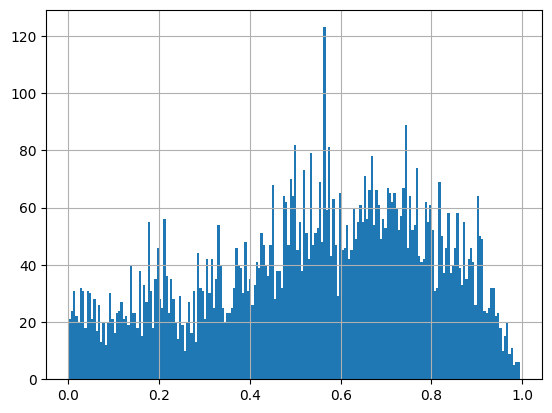

In [ ]:
# Code for displaying the distribution of energy
energy_column = spotify2_df['energy']
energy_column.hist(bins=200)
plt.show()

The `energy` data of the dataset is not normally distributed. Conveniently, the values are between 0 to 1, therefore it is optional to standardize or normalize the `energy` column.

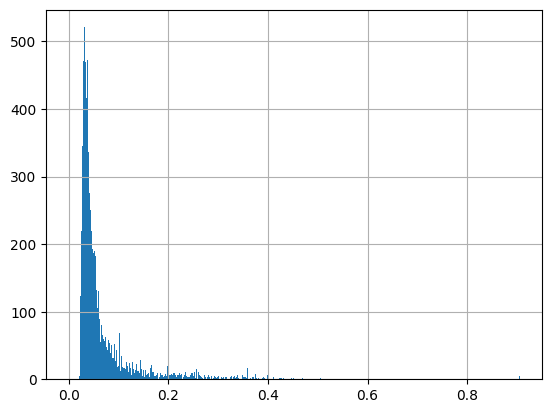

In [ ]:
# Code for displaying the distribution of speechiness
speechiness_column = spotify2_df['speechiness']
speechiness_column.hist(bins=500)
plt.show()

The histogram displays that `speechiness` is highly skewed to the right. A log transformation or square-root transformation would be ideal for such skewed distributions to make them normal.

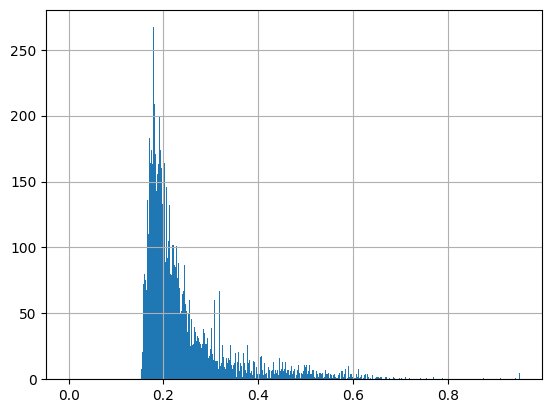

In [ ]:
spotify2_df['speechiness'] = np.sqrt(spotify2_df['speechiness'])
speechiness_column = spotify2_df['speechiness']
speechiness_column.hist(bins=500)
plt.show()

log1p() of numpy was tested on `speechiness`, but the spread remained narrow. However, the square root transform proved a better spread of the distribution.  Thus, this will be standardized similar to how other features are standardized for consistency with the audio features.

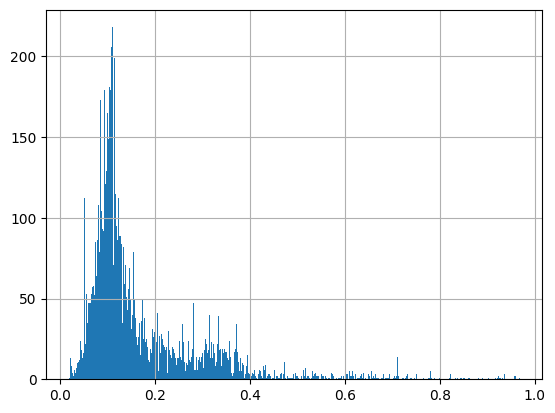

In [ ]:
# Code for displaying the distribution of liveness
liveness_column = spotify2_df['liveness']
liveness_column.hist(bins=500)
plt.show()

The liveness distribution is giving speechiness vibes. Therefore, square root transformation is applied.

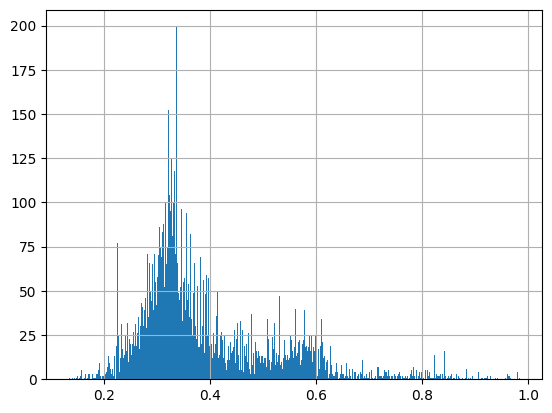

In [ ]:
spotify2_df['liveness'] = np.sqrt(spotify2_df['liveness'])
liveness_column = spotify2_df['liveness']
liveness_column.hist(bins=500)
plt.show()

Leaving `duration_min`, `loudness`, and `tempo` to the current scales that these independent variables for K-means clustering is unwise due to the large values that their scales allow for the quantification of their audio features. Therefore, it is wise, similar to how the other audio features were scaled in a value of 0 to 1, to normalize such features according to the minimum and maximum of their respective columns.

The column normalization has been defined in kmeans class defined for this project, therefore it is necessary to first initialize a kmeans object that would conduct the normalization of the dataset.

A K-means object has to be declared in order to utilize the functions defined in the K-means code. To do this, observe the code below:

Instantiate a `KMeans` object with `k equal to 8` (8 genres), `start_var equal to 0` (duration_min is #0 in .info() table), `end_var equal to 10`(until track_genre is #10 in .info() table), `num_observations equal to 7996`, and `data equal to the DataFrame object which represents the spotify2_df dataset`.

In [ ]:
kmeans = KMeans(8, 0, 10, 7996, spotify2_df)

# Normalization of the columns
#spotify2_df = kmeans.standardize_column(spotify2_df, 'duration_min')
spotify2_df = kmeans.normalize_column(spotify2_df, 'duration_min')
spotify2_df = kmeans.normalize_column(spotify2_df, 'loudness')
spotify2_df = kmeans.normalize_column(spotify2_df, 'tempo')


# After experiment, out of curiosity lang din, I tried to normalize the other columns
spotify2_df = kmeans.standardize_column(spotify2_df, 'danceability') #do not normalize this column for kpop, pop, and hip-hop
#spotify2_df = kmeans.normalize_column(spotify2_df, 'danceability')
spotify2_df = kmeans.standardize_column(spotify2_df, 'energy') #do not normalize this column for classical and jazz to be stripped away from the clusters
#spotify2_df['speechiness'] = np.sqrt(spotify2_df['speechiness'])
#spotify2_df = kmeans.normalize_column(spotify2_df, 'speechiness')
spotify2_df = kmeans.standardize_column(spotify2_df, 'speechiness')
#spotify2_df = kmeans.standardize_column(spotify2_df, 'acousticness')

#spotify2_df = kmeans.normalize_column(spotify2_df, 'instrumentalness')
#spotify2_df = kmeans.standardize_column(spotify2_df, 'instrumentalness')
spotify2_df = kmeans.standardize_column(spotify2_df, 'liveness')
#spotify2_df = kmeans.normalize_column(spotify2_df, 'valence')
#spotify2_df = kmeans.standardize_column(spotify2_df, 'valence')

spotify2_df.head()

,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0.165802,0.411555,-1.102476,0.638280,0.554634,0.593,0.000002,1.276434,0.620,0.671973,classical
1,0.268262,-0.537759,1.428212,0.902224,1.618066,0.365,0.000000,-0.685616,0.680,0.429758,classical
2,0.121982,0.202587,0.383801,0.856967,-0.753467,0.581,0.017200,2.083841,0.439,0.654666,classical
3,0.166291,0.722023,-1.002052,0.609211,-0.381406,0.596,0.015800,-0.221190,0.637,0.671931,classical
4,0.215526,0.053323,-0.941797,0.560359,-0.300023,0.581,0.010600,0.860736,0.241,0.552417,classical


## K-Means Clustering training

In [ ]:
kmeans = KMeans(8, 0, 10, 7996, spotify2_df)

In [ ]:
kmeans.initialize_centroids(spotify2_df)

,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.071879,-0.961667,-1.214951,0.620332,-0.578518,0.343,0.0,-0.907441,0.339,0.363113
1,0.05856,-0.478054,0.407903,0.717698,7.153041,0.704,0.0,3.698922,0.866,0.963152
2,0.128887,0.113029,1.617009,0.91969,1.111477,0.00174,0.0,4.278828,0.674,0.514088
3,0.062563,1.957923,0.508327,0.880102,4.364033,0.161,0.0,-0.925507,0.628,0.653918
4,0.103617,-2.424446,-2.001473,0.548755,-0.533287,0.908,0.914,3.317208,0.0384,0.34853
5,0.073191,-2.197566,1.319754,0.863167,4.073118,0.0316,0.000066,-1.118969,0.125,0.820499
6,0.099755,2.15495,1.231381,0.928399,0.342956,0.0192,0.0,-1.833048,0.551,0.56064
7,0.126823,-2.531916,1.27155,0.933706,-0.013444,0.00201,0.194,1.728044,0.354,0.796796


In [ ]:
groups = kmeans.train(spotify2_df, 7996)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Done clustering!


In [ ]:
cluster_0 = spotify2_df.loc[groups == 0]
cluster_1 = spotify2_df.loc[groups == 1]
cluster_2 = spotify2_df.loc[groups == 2]
cluster_3 = spotify2_df.loc[groups == 3]
cluster_4 = spotify2_df.loc[groups == 4]
cluster_5 = spotify2_df.loc[groups == 5]
cluster_6 = spotify2_df.loc[groups == 6]
cluster_7 = spotify2_df.loc[groups == 7]

print('Number of data points in each cluster:')
print('Cluster 0:')
print('Class Classical:\t', cluster_0.loc[cluster_0['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_0.loc[cluster_0['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_0.loc[cluster_0['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_0.loc[cluster_0['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_0.loc[cluster_0['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_0.loc[cluster_0['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_0.loc[cluster_0['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_0.loc[cluster_0['track_genre'] == 'rock'].shape[0])

print('\nCluster 1:')
print('Class Classical:\t', cluster_1.loc[cluster_1['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_1.loc[cluster_1['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_1.loc[cluster_1['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_1.loc[cluster_1['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_1.loc[cluster_1['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_1.loc[cluster_1['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_1.loc[cluster_1['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_1.loc[cluster_1['track_genre'] == 'rock'].shape[0])

print('\nCluster 2:')
print('Class Classical:\t', cluster_2.loc[cluster_2['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_2.loc[cluster_2['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_2.loc[cluster_2['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_2.loc[cluster_2['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_2.loc[cluster_2['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_2.loc[cluster_2['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_2.loc[cluster_2['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_2.loc[cluster_2['track_genre'] == 'rock'].shape[0])

print('\nCluster 3:')
print('Class Classical:\t', cluster_3.loc[cluster_3['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_3.loc[cluster_3['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_3.loc[cluster_3['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_3.loc[cluster_3['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_3.loc[cluster_3['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_3.loc[cluster_3['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_3.loc[cluster_3['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_3.loc[cluster_3['track_genre'] == 'rock'].shape[0])

print('\nCluster 4:')
print('Class Classical:\t', cluster_4.loc[cluster_4['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_4.loc[cluster_4['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_4.loc[cluster_4['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_4.loc[cluster_4['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_4.loc[cluster_4['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_4.loc[cluster_4['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_4.loc[cluster_4['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_4.loc[cluster_4['track_genre'] == 'rock'].shape[0])

print('\nCluster 5:')
print('Class Classical:\t', cluster_5.loc[cluster_5['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_5.loc[cluster_5['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_5.loc[cluster_5['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_5.loc[cluster_5['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_5.loc[cluster_5['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_5.loc[cluster_5['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_5.loc[cluster_5['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_5.loc[cluster_5['track_genre'] == 'rock'].shape[0])

print('\nCluster 6:')
print('Class Classical:\t', cluster_6.loc[cluster_6['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_6.loc[cluster_6['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_6.loc[cluster_6['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_6.loc[cluster_6['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_6.loc[cluster_6['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_6.loc[cluster_6['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_6.loc[cluster_6['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_6.loc[cluster_6['track_genre'] == 'rock'].shape[0])

print('\nCluster 7:')
print('Class Classical:\t', cluster_7.loc[cluster_7['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_7.loc[cluster_7['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_7.loc[cluster_7['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_7.loc[cluster_7['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_7.loc[cluster_7['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_7.loc[cluster_7['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_7.loc[cluster_7['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_7.loc[cluster_7['track_genre'] == 'rock'].shape[0])

Number of data points in each cluster:
Cluster 0:
Class Classical:	 675
Class Country:	 107
Class Hip-hop:	 4
Class Indie:	 65
Class Jazz:	 317
Class K-pop:	 28
Class Pop:	 48
Class Rock:	 35

Cluster 1:
Class Classical:	 8
Class Country:	 18
Class Hip-hop:	 113
Class Indie:	 26
Class Jazz:	 18
Class K-pop:	 52
Class Pop:	 38
Class Rock:	 19

Cluster 2:
Class Classical:	 16
Class Country:	 184
Class Hip-hop:	 145
Class Indie:	 118
Class Jazz:	 76
Class K-pop:	 190
Class Pop:	 122
Class Rock:	 210

Cluster 3:
Class Classical:	 10
Class Country:	 8
Class Hip-hop:	 242
Class Indie:	 49
Class Jazz:	 27
Class K-pop:	 102
Class Pop:	 107
Class Rock:	 16

Cluster 4:
Class Classical:	 138
Class Country:	 36
Class Hip-hop:	 7
Class Indie:	 53
Class Jazz:	 94
Class K-pop:	 32
Class Pop:	 41
Class Rock:	 47

Cluster 5:
Class Classical:	 5
Class Country:	 79
Class Hip-hop:	 380
Class Indie:	 184
Class Jazz:	 42
Class K-pop:	 299
Class Pop:	 247
Class Rock:	 132

Cluster 6:
Class Classical:	 115
Cl

See insights and conclusions below.

## Additional consideration
(although unwise (10 clusters))

In [ ]:
kmeans2 = KMeans(10, 0, 10, 7996, spotify2_df)
kmeans2.initialize_centroids(spotify2_df)
groups2 = kmeans2.train(spotify2_df, 7996)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [ ]:
cluster_0 = spotify2_df.loc[groups2 == 0]
cluster_1 = spotify2_df.loc[groups2 == 1]
cluster_2 = spotify2_df.loc[groups2 == 2]
cluster_3 = spotify2_df.loc[groups2 == 3]
cluster_4 = spotify2_df.loc[groups2 == 4]
cluster_5 = spotify2_df.loc[groups2 == 5]
cluster_6 = spotify2_df.loc[groups2 == 6]
cluster_7 = spotify2_df.loc[groups2 == 7]
cluster_8 = spotify2_df.loc[groups2 == 8]
cluster_9 = spotify2_df.loc[groups2 == 9]

print('\nCluster 0:')
print('Class Classical:\t', cluster_0.loc[cluster_0['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_0.loc[cluster_0['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_0.loc[cluster_0['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_0.loc[cluster_0['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_0.loc[cluster_0['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_0.loc[cluster_0['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_0.loc[cluster_0['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_0.loc[cluster_0['track_genre'] == 'rock'].shape[0])

print('\nCluster 1:')
print('Class Classical:\t', cluster_1.loc[cluster_1['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_1.loc[cluster_1['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_1.loc[cluster_1['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_1.loc[cluster_1['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_1.loc[cluster_1['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_1.loc[cluster_1['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_1.loc[cluster_1['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_1.loc[cluster_1['track_genre'] == 'rock'].shape[0])

print('\nCluster 2:')
print('Class Classical:\t', cluster_2.loc[cluster_2['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_2.loc[cluster_2['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_2.loc[cluster_2['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_2.loc[cluster_2['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_2.loc[cluster_2['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_2.loc[cluster_2['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_2.loc[cluster_2['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_2.loc[cluster_2['track_genre'] == 'rock'].shape[0])

print('\nCluster 3:')
print('Class Classical:\t', cluster_3.loc[cluster_3['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_3.loc[cluster_3['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_3.loc[cluster_3['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_3.loc[cluster_3['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_3.loc[cluster_3['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_3.loc[cluster_3['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_3.loc[cluster_3['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_3.loc[cluster_3['track_genre'] == 'rock'].shape[0])

print('\nCluster 4:')
print('Class Classical:\t', cluster_4.loc[cluster_4['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_4.loc[cluster_4['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_4.loc[cluster_4['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_4.loc[cluster_4['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_4.loc[cluster_4['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_4.loc[cluster_4['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_4.loc[cluster_4['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_4.loc[cluster_4['track_genre'] == 'rock'].shape[0])

print('\nCluster 5:')
print('Class Classical:\t', cluster_5.loc[cluster_5['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_5.loc[cluster_5['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_5.loc[cluster_5['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_5.loc[cluster_5['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_5.loc[cluster_5['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_5.loc[cluster_5['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_5.loc[cluster_5['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_5.loc[cluster_5['track_genre'] == 'rock'].shape[0])

print('\nCluster 6:')
print('Class Classical:\t', cluster_6.loc[cluster_6['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_6.loc[cluster_6['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_6.loc[cluster_6['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_6.loc[cluster_6['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_6.loc[cluster_6['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_6.loc[cluster_6['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_6.loc[cluster_6['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_6.loc[cluster_6['track_genre'] == 'rock'].shape[0])

print('\nCluster 7:')
print('Class Classical:\t', cluster_7.loc[cluster_7['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_7.loc[cluster_7['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_7.loc[cluster_7['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_7.loc[cluster_7['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_7.loc[cluster_7['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_7.loc[cluster_7['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_7.loc[cluster_7['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_7.loc[cluster_7['track_genre'] == 'rock'].shape[0])

print('\nCluster 8:')
print('Class Classical:\t', cluster_8.loc[cluster_8['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_8.loc[cluster_8['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_8.loc[cluster_8['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_8.loc[cluster_8['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_8.loc[cluster_8['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_8.loc[cluster_8['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_8.loc[cluster_8['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_8.loc[cluster_8['track_genre'] == 'rock'].shape[0])

print('\nCluster 9:')
print('Class Classical:\t', cluster_9.loc[cluster_9['track_genre'] == 'classical'].shape[0])
print('Class Country:\t', cluster_9.loc[cluster_9['track_genre'] == 'country'].shape[0])
print('Class Hip-hop:\t', cluster_9.loc[cluster_9['track_genre'] == 'hip-hop'].shape[0])
print('Class Indie:\t', cluster_9.loc[cluster_9['track_genre'] == 'indie'].shape[0])
print('Class Jazz:\t', cluster_9.loc[cluster_9['track_genre'] == 'jazz'].shape[0])
print('Class K-pop:\t', cluster_9.loc[cluster_9['track_genre'] == 'k-pop'].shape[0])
print('Class Pop:\t', cluster_9.loc[cluster_9['track_genre'] == 'pop'].shape[0])
print('Class Rock:\t', cluster_9.loc[cluster_9['track_genre'] == 'rock'].shape[0])


Cluster 0:
Class Classical:	 13
Class Country:	 284
Class Hip-hop:	 69
Class Indie:	 190
Class Jazz:	 33
Class K-pop:	 154
Class Pop:	 201
Class Rock:	 317

Cluster 1:
Class Classical:	 9
Class Country:	 5
Class Hip-hop:	 180
Class Indie:	 36
Class Jazz:	 23
Class K-pop:	 63
Class Pop:	 77
Class Rock:	 8

Cluster 2:
Class Classical:	 7
Class Country:	 18
Class Hip-hop:	 104
Class Indie:	 25
Class Jazz:	 18
Class K-pop:	 49
Class Pop:	 37
Class Rock:	 15

Cluster 3:
Class Classical:	 650
Class Country:	 69
Class Hip-hop:	 0
Class Indie:	 43
Class Jazz:	 286
Class K-pop:	 15
Class Pop:	 26
Class Rock:	 26

Cluster 4:
Class Classical:	 4
Class Country:	 14
Class Hip-hop:	 174
Class Indie:	 46
Class Jazz:	 8
Class K-pop:	 142
Class Pop:	 94
Class Rock:	 46

Cluster 5:
Class Classical:	 132
Class Country:	 38
Class Hip-hop:	 9
Class Indie:	 56
Class Jazz:	 147
Class K-pop:	 36
Class Pop:	 41
Class Rock:	 39

Cluster 6:
Class Classical:	 9
Class Country:	 62
Class Hip-hop:	 264
Class Indie:

This is the best run so far, all genres can be clustered

# Statistical Inference

In [ ]:
variables = [
    'duration_min', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

var_df_mapping = {
    'duration_min': 'duration_df',
    'danceability': 'danceability_df',
    'energy': 'energy_df',
    'loudness': 'loudness_df',
    'speechiness': 'speechiness_df',
    'acousticness': 'acousticness_df',
    'instrumentalness': 'instrumentalness_df',
    'liveness': 'liveness_df',
    'valence': 'valence_df',
    'tempo': 'tempo_df'
}

# Loop through each variable and replace the values in spotify2_df
for var in variables:

    df_name = var_df_mapping[var]

    var_df = globals()[df_name]

    replacement_dict = var_df[(var, 'mean')].to_dict()

    spotify2_df[var] = spotify2_df['track_genre'].map(replacement_dict)

The code above takes the old values of the spotify2_df before the min-max normalization has taken in effect because that is what we will use for the t-test.

The genres for the test are selected randomly to avoid bias towards some genre's audio features.

##Hypothesis testing for the audio feature of duration of the two genres jazz and rock. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean duration of the genres jazz and rock.

**Alternative Hypothesis:** There is significant difference between the mean duration of the genres jazz and rock.

First we calculate the mean duration of the two genres jazz and rock

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'duration_min':['mean', 'median', 'std', len]}).drop(['classical', 'hip-hop', 'pop', 'k-pop', 'country', 'indie'])
summary_stat

      duration_min  danceability    energy  loudness  speechiness  \
0         0.165802      0.411555 -1.102476  0.638280     0.554634   
1         0.268262     -0.537759  1.428212  0.902224     1.618066   
2         0.121982      0.202587  0.383801  0.856967    -0.753467   
3         0.166291      0.722023 -1.002052  0.609211    -0.381406   
4         0.215526      0.053323 -0.941797  0.560359    -0.300023   
...            ...           ...       ...       ...          ...   
7991      0.140987     -0.800462  1.187194  0.852432    -0.401017   
7992      0.140987     -0.800462  1.187194  0.852432    -0.401017   
7993      0.140987     -0.800462  1.187194  0.852432    -0.401017   
7994      0.140987     -0.800462  1.187194  0.852432    -0.401017   
7995      0.140987     -0.800462  1.187194  0.852432    -0.401017   

      acousticness  instrumentalness  liveness  valence     tempo track_genre  
0           0.5930          0.000002  1.276434    0.620  0.671973   classical  
1          

Based on this, the difference in sample mean is:

In [ ]:
jazz_mean=summary_stat.loc['jazz'].loc['duration_min'].loc['mean']
rock_mean=summary_stat.loc['rock'].loc['duration_min'].loc['mean']
print(jazz_mean-rock_mean)

-0.01630539603198118


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='jazz']['duration_min'],
          spotify2_df[spotify2_df['track_genre']=='rock']['duration_min'],
          equal_var = False)

TtestResult(statistic=-9.27790669863365, pvalue=4.623467861749558e-20, df=1869.3110323043684)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'duration_min' variable for jazz and rock genres.

##Hypothesis testing for the audio feature of tempo of the two genres indie and country. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean tempo of the genres indie and country.

**Alternative Hypothesis:** There is significant difference between the mean tempo of the genres indie and country.

First we calculate the mean tempo of the two genres indie and country

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'tempo':['mean', 'median', 'std', len]}).drop(['classical', 'hip-hop', 'pop', 'k-pop', 'jazz', 'rock'])
summary_stat


tempo                          
                 mean    median       std   len
track_genre                                    
country      0.579224  0.579510  0.148399  1000
indie        0.556470  0.542163  0.143188  1000

Based on this, the difference in sample mean is:

In [ ]:
country_mean=summary_stat.loc['country'].loc['tempo'].loc['mean']
indie_mean=summary_stat.loc['indie'].loc['tempo'].loc['mean']
print(country_mean-indie_mean)

0.022754630494916217


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='country']['tempo'],
          spotify2_df[spotify2_df['track_genre']=='indie']['tempo'],
          equal_var = False)

TtestResult(statistic=3.489366179819341, pvalue=0.0004946726712045902, df=1995.4519652562308)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'tempo' variable for country and indie genres.

##Hypothesis testing for the audio feature of valence of the two genres Hip-Hop and Pop. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean valence of the genres Hip-Hop and Pop.

**Alternative Hypothesis:** There is significant difference between the mean valence of the genres Hip-Hop and Pop.

First we calculate the mean valence of the two genres Hip-Hop and Pop

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'valence':['mean', 'median', 'std', len]}).drop(['classical', 'indie', 'country', 'k-pop', 'jazz', 'rock'])
summary_stat


valence                       
                 mean median       std   len
track_genre                                 
hip-hop      0.551248  0.550  0.224913  1000
pop          0.506223  0.498  0.212209  1000

Based on this, the difference in sample mean is:

In [ ]:
hiphop_mean=summary_stat.loc['hip-hop'].loc['valence'].loc['mean']
pop_mean=summary_stat.loc['pop'].loc['valence'].loc['mean']
print(hiphop_mean-pop_mean)

0.04502509999999993


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='hip-hop']['valence'],
          spotify2_df[spotify2_df['track_genre']=='pop']['valence'],
          equal_var = False)

TtestResult(statistic=4.6045096851305445, pvalue=4.395497155483822e-06, df=1991.2830346480278)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'valence' variable for hip-hop and pop genres.

##Hypothesis testing for the audio feature of speechiness of the two genres country and jazz. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean speechiness of the genres country and jazz.

**Alternative Hypothesis:** There is significant difference between the mean speechiness of the genres country and jazz.

First we calculate the mean speechiness of the two genres country and jazz

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'speechiness':['mean', 'median', 'std', len]}).drop(['classical', 'indie', 'hip-hop', 'k-pop', 'pop', 'rock'])
summary_stat


speechiness                          
                   mean    median       std   len
track_genre                                      
country       -0.462878 -0.627611  0.500928  1000
jazz          -0.262105 -0.486512  0.841031  1000

Based on this, the difference in sample mean is:

In [ ]:
country_mean=summary_stat.loc['country'].loc['speechiness'].loc['mean']
jazz_mean=summary_stat.loc['jazz'].loc['speechiness'].loc['mean']
print(country_mean-jazz_mean)

-0.20077269609590914


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='country']['speechiness'],
          spotify2_df[spotify2_df['track_genre']=='jazz']['speechiness'],
          equal_var = False)

TtestResult(statistic=-6.485786313484273, pvalue=1.167541583757767e-10, df=1628.5660405971105)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'speechiness' variable for country and jazz genres.

##Hypothesis testing for the audio feature of acousticness of the two genres k-pop and pop. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean acousticness of the genres k-pop and pop.

**Alternative Hypothesis:** There is significant difference between the mean acousticness of the genres k-pop and pop.

First we calculate the mean acousticness of the two genres k-pop and pop

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'acousticness':['mean', 'median', 'std', len]}).drop(['classical', 'indie', 'hip-hop', 'rock', 'country', 'jazz'])
summary_stat

acousticness                       
                    mean median       std   len
track_genre                                    
k-pop           0.292002  0.186  0.280724   998
pop             0.343693  0.281  0.285680  1000

Based on this, the difference in sample mean is:

In [ ]:
kpop_mean=summary_stat.loc['k-pop'].loc['acousticness'].loc['mean']
pop_mean=summary_stat.loc['pop'].loc['acousticness'].loc['mean']
print(kpop_mean-pop_mean)

-0.05169031160320636


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='k-pop']['acousticness'],
          spotify2_df[spotify2_df['track_genre']=='pop']['acousticness'],
          equal_var = False)

TtestResult(statistic=-4.079133967561987, pvalue=4.6981008581470505e-05, df=1995.520849215374)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'acousticness' variable for K-pop and pop genres.

##Hypothesis testing for the audio feature of instrumentalness of the two genres indie and rock. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean instrumentalness of the genres indie and rock.

**Alternative Hypothesis:** There is significant difference between the mean instrumentalness of the genres indie and rock.

First we calculate the mean instrumentalness of the two genres indie and rock

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'instrumentalness':['mean', 'median', 'std', len]}).drop(['classical', 'hip-hop', 'country', 'jazz', 'k-pop', 'pop'])
summary_stat

instrumentalness                          
                        mean    median       std   len
track_genre                                           
indie               0.052806  0.000025  0.169736  1000
rock                0.020978  0.000003  0.090074  1000

Based on this, the difference in sample mean is:

In [ ]:
indie_mean=summary_stat.loc['indie'].loc['instrumentalness'].loc['mean']
rock_mean=summary_stat.loc['rock'].loc['instrumentalness'].loc['mean']
print(indie_mean-rock_mean)

0.031827815829999995


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='indie']['instrumentalness'],
          spotify2_df[spotify2_df['track_genre']=='rock']['instrumentalness'],
          equal_var = False)

TtestResult(statistic=5.2378691368747825, pvalue=1.8519963551577055e-07, df=1520.3224134726784)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'instrumentalness' variable for indie and rock genres.

##Hypothesis testing for the audio feature of liveness of the two genres classical and hip-hop. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean liveness of the genres classical and hip-hop.

**Alternative Hypothesis:** There is significant difference between the mean liveness of the genres classical and hip-hop.

First we calculate the mean liveness of the two genres classical and hip-hop

In [ ]:
spotify2_df

summary_stat=spotify2_df.groupby('track_genre').agg({'liveness':['mean', 'median', 'std', len]}).drop(['country', 'jazz', 'k-pop', 'pop', 'indie', 'rock'])
summary_stat

liveness                          
                 mean    median       std   len
track_genre                                    
classical   -0.029947 -0.348549  0.951706   998
hip-hop      0.150462 -0.252467  1.126882  1000

Based on this, the difference in sample mean is:

In [ ]:
classical_mean=summary_stat.loc['classical'].loc['liveness'].loc['mean']
hiphop_mean=summary_stat.loc['hip-hop'].loc['liveness'].loc['mean']
print(hiphop_mean-classical_mean)

0.18040903454771443


We begin the unpaired t-test

In [ ]:
ttest_ind(spotify2_df[spotify2_df['track_genre']=='classical']['liveness'],
          spotify2_df[spotify2_df['track_genre']=='hip-hop']['liveness'],
          equal_var = False)

TtestResult(statistic=-3.8662239742724647, pvalue=0.0001141680517432918, df=1942.85608502391)

Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'liveness' variable for classical and hip-hop genres.

## Hypothesis testing for the audio feature of danceability of the two genres country and classical. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean danceability of the genres country and classical.

**Alternative Hypothesis:** There is significant difference between the mean danceability of the genres country and classical

First we calculate the mean danceability of the two genres country and classical

In [ ]:
country_genre = spotify2_df[spotify2_df['track_genre'] == 'country']['danceability']
classical_genre = spotify2_df[spotify2_df['track_genre'] == 'classical']['danceability']

country_mean = country_genre.mean()
country_std = country_genre.std()
country_n = len(country_genre)

classical_mean = classical_genre.mean()
classical_std = classical_genre.std()
classical_n = len(classical_genre)

table_data = [
    ["Genre", "Mean", "Standard Deviation", "Sample Size"],
    ["Country", f"{country_mean:.3f}", f"{country_std:.3f}", country_n],
    ["Classical", f"{classical_mean:.3f}", f"{classical_std:.3f}", classical_n]
]

def print_table(data):
    for row in data:
        print("{:<10} {:<10} {:<20} {:<10}".format(*row))

print_table(table_data)

Genre      Mean       Standard Deviation   Sample Size
Country    -0.112     0.743                1000      
Classical  -1.148     0.868                998       


With the mean and standard deviation shown we will now begin the unpaired test.

In [ ]:
t_stat, p_value = stats.ttest_ind(country_genre, classical_genre)

df = country_n + classical_n - 2

print("\nStatistical Analysis Results")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {df}")


Statistical Analysis Results
t-statistic: 28.652595326300563
p-value: 1.571725312894203e-151
Degrees of Freedom: 1996


Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'danceability' variables for the country and classical genres.

## Hypothesis testing for the audio feature of energy of the two genres hip-hop and indie. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean energy of the genres hip-hop and indie.

**Alternative Hypothesis:** There is significant difference between the mean energy of the genres hip-hop and indie.

First we calculate the mean energy of the two genres hip-hop and indie

In [ ]:
hiphop_genre = spotify2_df[spotify2_df['track_genre'] == 'hip-hop']['energy']
indie_genre = spotify2_df[spotify2_df['track_genre'] == 'indie']['energy']

hiphop_mean = hiphop_genre.mean()
hiphop_std = hiphop_genre.std()
hiphop_n = len(hiphop_genre)

indie_mean = indie_genre.mean()
indie_std = indie_genre.std()
indie_n = len(indie_genre)

table_data = [
    ["Genre", "Mean", "Standard Deviation", "Sample Size"],
    ["Hip-Hop", f"{hiphop_mean:.3f}", f"{hiphop_std:.3f}", hiphop_n],
    ["Indie", f"{indie_mean:.3f}", f"{indie_std:.3f}", indie_n]
]

def print_table(data):
    for row in data:
        print("{:<10} {:<10} {:<20} {:<10}".format(*row))

print_table(table_data)

Genre      Mean       Standard Deviation   Sample Size
Hip-Hop    0.563      0.586                1000      
Indie      0.055      0.813                1000      


With the mean and standard deviation shown we will now begin the unpaired test.

In [ ]:
t_stat, p_value = stats.ttest_ind(hiphop_genre, indie_genre)

df = hiphop_n + indie_n - 2

print("\nStatistical Analysis Results")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {df}")


Statistical Analysis Results
t-statistic: 16.0113960581897
p-value: 2.2167253410324757e-54
Degrees of Freedom: 1998


Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'energy' variables for the hip-hop and indie genres.


## Hypothesis testing for the audio feature of loudness of the two genres hip-hop and indie. It will be an unpaired test

**Null Hypothesis:** There is no significant difference between the mean loudness of the genres pop and rock.

**Alternative Hypothesis:** There is significant difference between the mean loudness of the genres pop and rock.

First we calculate the mean loudness of the two genres pop and rock

In [ ]:
pop_genre = spotify2_df[spotify2_df['track_genre'] == 'pop']['loudness']
rock_genre = spotify2_df[spotify2_df['track_genre'] == 'rock']['loudness']

pop_mean = pop_genre.mean()
pop_std = pop_genre.std()
pop_n = len(pop_genre)

rock_mean = rock_genre.mean()
rock_std = rock_genre.std()
rock_n = len(rock_genre)

table_data = [
    ["Genre", "Mean", "Standard Deviation", "Sample Size"],
    ["Pop", f"{pop_mean:.3f}", f"{pop_std:.3f}", pop_n],
    ["Rock", f"{rock_mean:.3f}", f"{rock_std:.3f}", rock_n]
]

def print_table(data):
    for row in data:
        print("{:<10} {:<10} {:<20} {:<10}".format(*row))

print_table(table_data)

Genre      Mean       Standard Deviation   Sample Size
Pop        0.834      0.062                1000      
Rock       0.841      0.064                1000      


With the mean and standard deviation shown we will now begin the unpaired test.

In [ ]:
t_stat, p_value = stats.ttest_ind(pop_genre, rock_genre)

df = pop_n + rock_n - 2

print("\nStatistical Analysis Results")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {df}")


Statistical Analysis Results
t-statistic: -2.484032160795483
p-value: 0.013071804342059325
Degrees of Freedom: 1998


Assuming a confidence level of 95%, alpha of 0.05, we reject the null hypothesis based on our p-value being less than 0.05

Therefore, we conclude that there is a statistically significant difference between the means of the 'loudness' variables for the pop and rock genres.

## Insights and Conclusions
Our analysis reveals that audio features such as danceability, energy, and acousticness significantly influence the genre of a song. Clustering analysis further supports that songs with similar audio features tend to group together, suggesting that these features are strong indicators of genre classification. The result of all the statistical inference of all the audio features between the genres resulted in a p-value lower than the alpha which is 0.05, confirming that the differences in these features across genres are statistically significant. The audio features of songs do influence their genre, as evidenced by the significant differences observed through statistical hypothesis testing. The variations in audio features across genres highlight the unique elements that define each genre.

There appears to be three main groups observable as a pattern in the clustering conducted in this project. `Classical` and `Jazz`; `Hip-hop`, `K-pop`, and `Pop`; and `Country` and `Rock`.

For `Hip-hop`, `K-pop`, and `Pop`, the common grouping of these three in the same cluster can be explained through the EDA of the danceability audio feature. The three are similarly related in interquartile distribution.

For `Classical` and `Jazz`, the instrumentalness and acousticness explain their similar distributions.

Lastly, for `Country` and `Rock`, tempo, valence, and liveness explain their similarity in distribution.

With these genres predicted through K-means clustering, people could use these relations to provide better recommendation systems, artists could create a mix of the groups or spice of their own, and people could have an idea of the impacts of audio features relating to the taste they have in music.

For future studies, it is recommended to explore with more audio features and encompass a diverse range of genres for data scientists to explore the relations of the genres of songs and the audio features that color their style.

Thus answers our question on how audio features influence a song's genre, showing that genres can be characterized and distinguished by their unique audio feature profiles.


## Use of Generative AI and AI-assited technology

During the makings of this project, the authors utilized the usage of AI to enhance and optimize our code. Following the use of this tool/service, the authors then reviewed and edited the content as if deemed necessary.
